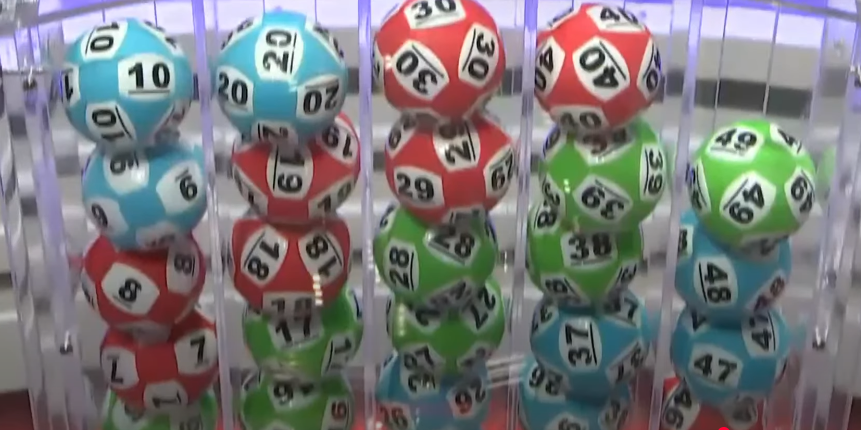

# Hong Kong Powerball (MarkSix) - Is the Powerball as Random as People Believe?

# TLDR
*MarkSix is not as random as commonly perceived.*

Here are some observations that suggest potential patterns in MarkSix (Since 2011):
1. Grouping numbers into odd, even, low, or high categories does not influence the outcome of the draws.
   
2. When numbers are divided into 7 groups, each containing 7 numbers (1-7, 8-14, etc.), interesting patterns emerge:

   Group 29-35 appears significantly more frequently in draws.

   Group 36-42 appears significantly less often in draws.
3. Grouping numbers by their initial horizontal position before entering the lottery machine shows:

    1_row (1, 11, 21, 31, 41) is drawn significantly more often.
    
    4_row (4, 14, 24, 34, 44) is drawn significantly less often.
    
    6_row (6, 16, 26, 36, 46) is drawn significantly less often.
    
    7_row (7, 17, 27, 37, 47) is drawn significantly less often.
        
    9_row (9, 19, 29, 39, 49) is drawn significantly more often.

4. Grouping numbers by their initial vertical position before entering the lottery machine reveals:

    Numbers 21-30 are drawn significantly more often.
   
5. "From last draw" - numbers that appear in one lottery have a chance to appear again in the next draw:

    The numbers with a significant difference, at alpha = 0.05, are as follows:
   
    If 41, 40, or 5 was drawn, they have a significantly lower chance of being drawn again in the next lottery compared to others.
   
6. The likelihood of each number being drawn varies; one might assume they should be relatively even, but this is not the case:

    Numbers 49, 30, and 34 have a significantly higher chance of being drawn, while

    Numbers 41, 5 and 19 have a significantly lower chance.
   
7. The order in which numbers are drawn also seems to be a factor:

   *(PS. This finding was later found to be flawed, the lottery results were always sorted, thus the position of the balls was not provided, unfortunely. Still keeping this as a record for educational purpose)*

    Since 2008, number 1 has only been drawn as the 1st ball, never as the 2nd, 3rd, or any subsequent position.

    In contrast, number 49 has only been drawn as the 6th ball.
    
    More details are provided below.

10. Number Clusters - Would some numbers have a higher likelihood to appear with some other numbers in the same lottery draw?
   
    It seems that only combinations of two numbers have sufficient data to establish a semi-normal distribution.

    Combinations of three numbers are beginning to show a pattern, but there isn't enough data to form a normal distribution. Perhaps in another 50 years? they may develop a normal distribution suitable for analysis.

    The same applies to combinations of four, five, and six numbers.

    For combinations of 2 numbers, the max count is 44, while the min count is 8.
    
    There are 1176 combinations of 2 numbers.

    Out of these, 71 combinations have a significantly higher likelihood of being drawn, while 64 combinations have a significantly lower likelihood.

11. Consecutive numbers

    The max count for consecutive numbers is 35, while the min count is 19.

    There are 47 consecutive numbers in total. Of these, 3 consecutive numbers have a significantly higher likelihood of being drawn, while 0 combinations have a significantly lower likelihood.

    The 3 consecutive numbers are: (48,49), (1,2) and (34,35)

12. Grouping by the colours of the balls (RGB, slope positions)
    
    Group Red has a higher chance to be drawn compare to group Green and Blue, and group Green has a higher chance compare to Blue:

    R > G > B

13. The interval before a number reappears

    The longest interval for each number range from 30 - 75 lottery draws.

14. The range of max - min of each lottery draw is:

    9 - 48

    There is not much insight from the range of winning number

# Import

In [12]:
import pandas as pd
import numpy as np
import random
from itertools import combinations
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
from scipy import stats
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
!python --version

Python 3.12.1


# Data overview

In [13]:
df = pd.read_csv('Mark_Six.csv')
df=df.rename(columns={'Winning Number 1':'1'})
# Drop rows where the date is before 2011
filtered_df = df[df['Date'] >= '2011-01-01']
#1st 20 columns
df_1sthalf=filtered_df.iloc[:,0:19]
# winning numbers 1-6
df_cols=filtered_df.iloc[:,2:8]
df_cols.columns=['1st','2nd','3rd','4th','5th','6th']
#the rest
df_2ndhalf=filtered_df.iloc[:,19:34]
df_chi = pd.read_csv('Mark_Six_chinese.csv')
df_1sthalf.tail()

Draw        Date   1   2   3   4   5   6  Extra Number From Last  Low  \
1915  11/005  2011-01-11   1   2  29  37  42  48            38       NaN    2   
1916  11/004  2011-01-08  10  12  18  21  27  33             4       NaN    4   
1917  11/003  2011-01-06   4   7  14  15  19  26            43         4    5   
1918  11/002  2011-01-04   4   9  16  20  38  39            40     20,39    4   
1919  11/001  2011-01-02   1  13  20  24  37  39             3  13,20,39    4   

      High  Odd  Even  1-10  11-20  21-30  31-40  41-50  
1915     4    3     3     2      0      1      1      2  
1916     2    3     3     1      2      2      1      0  
1917     1    3     3     2      3      1      0      0  
1918     2    2     4     2      2      0      2      0  
1919     2    4     2     1      2      1      2      0

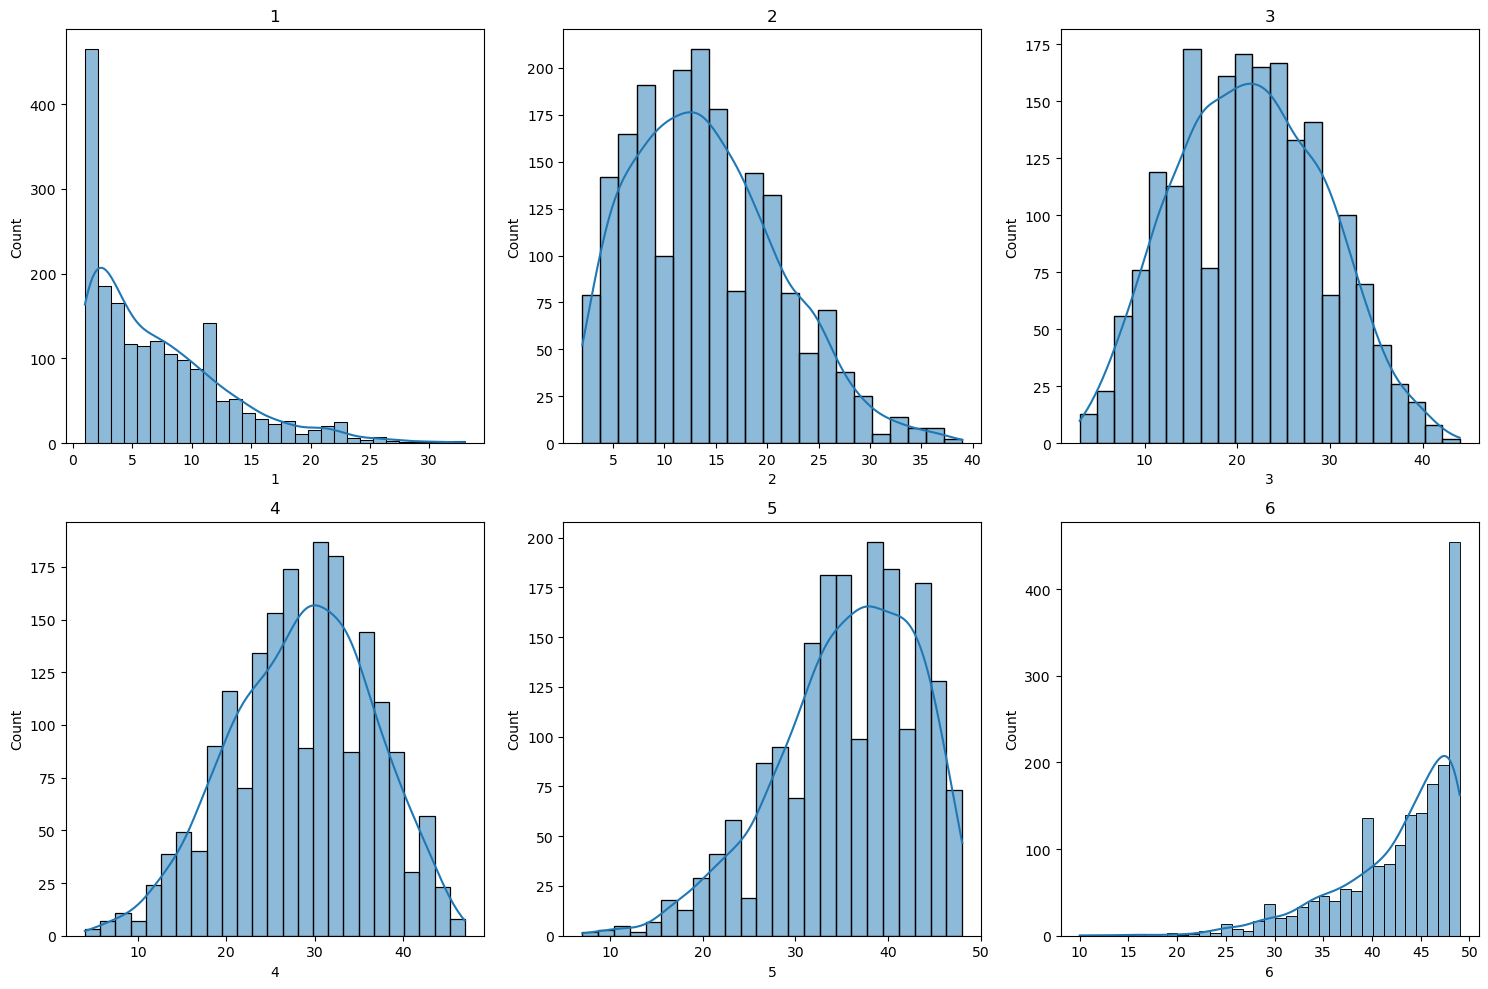

In [32]:
# let's visualize the distributions of df_cols
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(df_cols.columns):
    sns.histplot(df_cols[col], ax=ax[i//3, i%3], kde=True)
    ax[i//3, i%3].set_title(f'{col}')
plt.tight_layout()
plt.show()


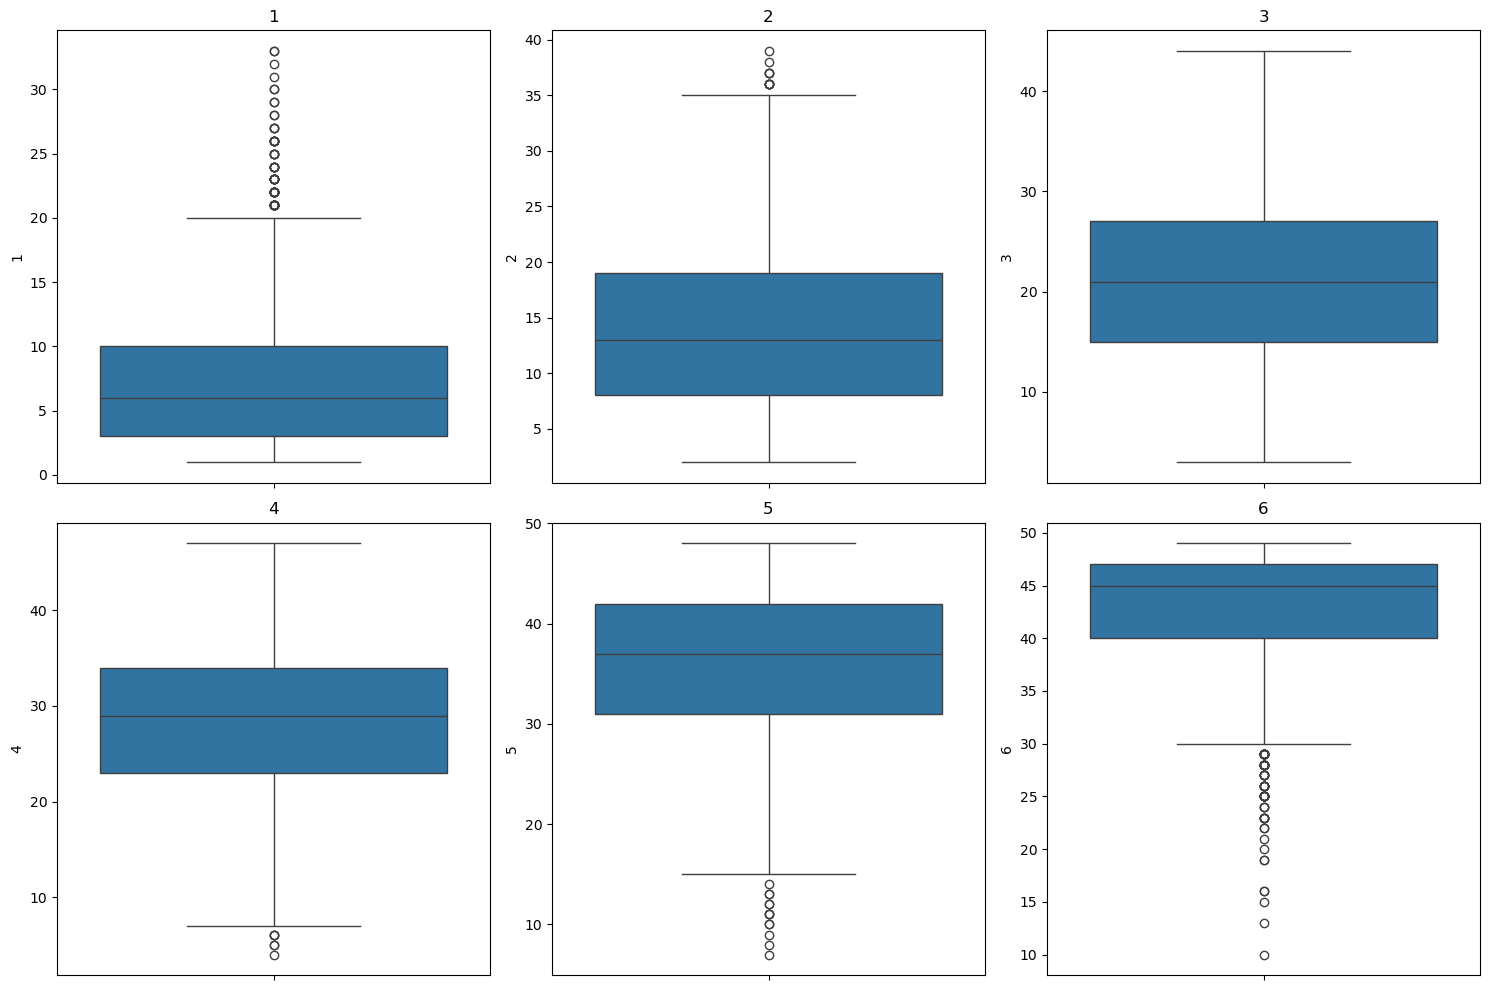

{'1': array([21, 33, 22, 27, 28, 23, 25, 24, 26, 29, 31, 32, 30]),
 '2': array([36, 37, 38, 39]),
 '3': array([], dtype=int64),
 '4': array([5, 6, 4]),
 '5': array([11,  8, 14, 13, 12, 10,  7,  9]),
 '6': array([28, 25, 29, 27, 26, 19, 24, 23, 16, 13, 15, 21, 10, 22, 20])}

In [35]:
# lets visualize the df_cols with a boxplot
# and list the unique outliers for each column
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
outliers = {}
for i, col in enumerate(df_cols.columns):
    sns.boxplot(df_cols[col], ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(f'{col}')
    q1 = df_cols[col].quantile(0.25)
    q3 = df_cols[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[col] = df_cols[(df_cols[col] < lower_bound) | (df_cols[col] > upper_bound)][col].unique()
plt.tight_layout()
plt.show()
outliers


It is obvious that the numbers were sorted.

In [110]:
df_chi.iloc[::,0:19].head()

期數          日期  中獎號碼 1   2   3   4   5   6  特別號碼 上期出現號碼  小  大  單數  雙數  \
0  25/011  2025-02-02      14  18  30  36  40  42     1  14,36  2  4   0   6   
1  25/010  2025-01-25       7  14  19  31  36  45    24    NaN  3  3   4   2   
2  25/009  2025-01-23       3   6  24  25  34  37    45    NaN  3  3   3   3   
3  25/008  2025-01-21      16  22  33  43  48  49     8    NaN  2  4   3   3   
4  25/007  2025-01-18       3   4   6  12  18  32    28    3,4  5  1   1   5   

   1-10  11-20  21-30  31-40  41-50  
0     0      2      1      2      1  
1     1      2      0      2      1  
2     2      0      2      2      0  
3     0      1      1      1      3  
4     3      2      0      1      0

In [111]:
#the rest of the columns
df_2ndhalf.head()

Division 1 Winners  Division 1 Prize  Division 2 Winners  Division 2 Prize  \
0                 1.0       193762620.0                12.0         1215620.0   
1                 2.0         7578090.0                 1.0         1580300.0   
2                 0.0               0.0                 0.5          834970.0   
3                 1.0        24588320.0                 3.0          873060.0   
4                 0.5        16730720.0                 6.0          346480.0   

   Division 3 Winners  Division 3 Prize  Division 4 Winners  Division 4 Prize  \
0               536.5           72500.0              1358.0            9600.0   
1                62.0           84960.0               204.5            9600.0   
2                50.5           88180.0               127.0            9600.0   
3               116.5           59950.0               365.0            9600.0   
4               268.0           20680.0               649.5            9600.0   

   Division 5 Winners  Division 5 Prize  Division 6 Winners  Division 6 Prize  \
0             29767.6             640.0             42866.3             320.0   
1              3961.2             640.0              5473.9             320.0   
2              3505.7             640.0              4022.2             320.0   
3              6223.0             640.0              9706.5             320.0   
4             11180.2             640.0             14642.0             320.0   

   Division 7 Winners  Division 7 Prize   Turnover  
0            569761.9              40.0  380697962  
1             75878.0              40.0   51547722  
2             72790.4              40.0   43343702  
3            108389.9              40.0   71603316  
4            164579.8              40.0   70509097

In [112]:
df_chi.iloc[::, 19:34].head()

頭獎 中獎注數     頭獎 每注獎金  二獎 中獎注數    二獎 每注獎金  三獎 中獎注數  三獎 每注獎金  四獎 中獎注數  \
0      NaN         NaN      NaN        NaN      NaN      NaN      NaN   
1      2.0   7578090.0      1.0  1580300.0     62.0  84960.0    204.5   
2      0.0         0.0      0.5   834970.0     50.5  88180.0    127.0   
3      1.0  24588320.0      3.0   873060.0    116.5  59950.0    365.0   
4      0.5  16730720.0      6.0   346480.0    268.0  20680.0    649.5   

   四獎 每注獎金  五獎 中獎注數  五獎 每注獎金  六獎 中獎注數  六獎 每注獎金   七獎 中獎注數  七獎 每注獎金       總投注額  
0      NaN      NaN      NaN      NaN      NaN       NaN      NaN  380697962  
1   9600.0   3961.2    640.0   5473.9    320.0   75878.0     40.0   51547722  
2   9600.0   3505.7    640.0   4022.2    320.0   72790.4     40.0   43343702  
3   9600.0   6223.0    640.0   9706.5    320.0  108389.9     40.0   71603316  
4   9600.0  11180.2    640.0  14642.0    320.0  164579.8     40.0   70509097

In [113]:
df_1sthalf.describe()

1            2            3            4            5  \
count  1920.000000  1920.000000  1920.000000  1920.000000  1920.000000   
mean      7.191667    14.025521    21.388021    28.506250    35.620312   
std       5.787152     7.154578     7.983239     7.987677     7.521663   
min       1.000000     2.000000     3.000000     4.000000     7.000000   
25%       3.000000     8.000000    15.000000    23.000000    31.000000   
50%       6.000000    13.000000    21.000000    29.000000    37.000000   
75%      10.000000    19.000000    27.000000    34.000000    42.000000   
max      33.000000    39.000000    44.000000    47.000000    48.000000   

                 6  Extra Number          Low         High          Odd  \
count  1920.000000   1920.000000  1920.000000  1920.000000  1920.000000   
mean     42.732292     24.704687     2.956250     3.043750     3.002604   
std       6.085049     14.294628     1.146925     1.146925     1.154773   
min      10.000000      1.000000     0.000000     0.000000     0.000000   
25%      40.000000     12.000000     2.000000     2.000000     2.000000   
50%      45.000000     25.000000     3.000000     3.000000     3.000000   
75%      47.000000     37.000000     4.000000     4.000000     4.000000   
max      49.000000     49.000000     6.000000     6.000000     6.000000   

              Even         1-10        11-20        21-30        31-40  \
count  1920.000000  1920.000000  1920.000000  1920.000000  1920.000000   
mean      2.997396     1.218229     1.238021     1.246875     1.214063   
std       1.154773     0.950456     0.949541     0.934259     0.924740   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     1.000000     1.000000     1.000000     1.000000   
50%       3.000000     1.000000     1.000000     1.000000     1.000000   
75%       4.000000     2.000000     2.000000     2.000000     2.000000   
max       6.000000     6.000000     5.000000     4.000000     5.000000   

             41-50  
count  1920.000000  
mean      1.082812  
std       0.887007  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max       4.000000

In [9]:
df_2ndhalf.describe()

Division 1 Winners  Division 1 Prize  Division 2 Winners  \
count         2374.000000      2.374000e+03         2374.000000   
mean             0.458804      7.806728e+06            2.680329   
std              0.938907      1.568706e+07            3.639066   
min              0.000000      0.000000e+00            0.000000   
25%              0.000000      0.000000e+00            1.000000   
50%              0.000000      0.000000e+00            2.000000   
75%              1.000000      9.106724e+06            3.500000   
max             23.500000      1.937626e+08          104.700000   

       Division 2 Prize  Division 3 Winners  Division 3 Prize  \
count      2.374000e+03         2374.000000       2374.000000   
mean       9.729598e+05          109.905518      71748.342460   
std        7.539880e+05          104.340654      33338.690143   
min        0.000000e+00           17.000000       9600.000000   
25%        4.011875e+05           59.000000      44960.000000   
50%        8.447450e+05           80.000000      70520.000000   
75%        1.453249e+06          124.000000      94865.000000   
max        5.541450e+06         2470.000000     249250.000000   

       Division 4 Winners  Division 4 Prize  Division 5 Winners  \
count         2374.000000       2374.000000         2374.000000   
mean           268.823252       8726.537489         5516.920345   
std            203.884085       1852.330583         3944.687817   
min             57.000000       4800.000000         1446.200000   
25%            151.000000       9600.000000         3311.250000   
50%            205.250000       9600.000000         4352.500000   
75%            305.875000       9600.000000         6125.000000   
max           2042.600000       9600.000000        43397.000000   

       Division 5 Prize  Division 6 Winners  Division 6 Prize  \
count       2374.000000         2374.000000       2374.000000   
mean         581.769166         7308.571693        290.884583   
std          123.488706         4975.249698         61.744353   
min          320.000000         2153.500000        160.000000   
25%          640.000000         4440.025000        320.000000   
50%          640.000000         5818.500000        320.000000   
75%          640.000000         8133.400000        320.000000   
max          640.000000        54231.200000        320.000000   

       Division 7 Winners  Division 7 Prize      Turnover  
count         2374.000000       2374.000000  2.375000e+03  
mean         97371.130244         36.360573  5.176081e+07  
std          65011.817943          7.718044  3.421071e+07  
min          31431.500000         20.000000  2.121556e+07  
25%          62158.500000         40.000000  3.528063e+07  
50%          78366.100000         40.000000  4.278190e+07  
75%         105726.750000         40.000000  5.428350e+07  
max         732713.600000         40.000000  4.463953e+08

In [114]:
df_1sthalf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1920 entries, 0 to 1919
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Draw          1920 non-null   object
 1   Date          1920 non-null   object
 2   1             1920 non-null   int64 
 3   2             1920 non-null   int64 
 4   3             1920 non-null   int64 
 5   4             1920 non-null   int64 
 6   5             1920 non-null   int64 
 7   6             1920 non-null   int64 
 8   Extra Number  1920 non-null   int64 
 9   From Last     1067 non-null   object
 10  Low           1920 non-null   int64 
 11  High          1920 non-null   int64 
 12  Odd           1920 non-null   int64 
 13  Even          1920 non-null   int64 
 14  1-10          1920 non-null   int64 
 15  11-20         1920 non-null   int64 
 16  21-30         1920 non-null   int64 
 17  31-40         1920 non-null   int64 
 18  41-50         1920 non-null   int64 
dtypes: int64(16

In [115]:
df_2ndhalf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1920 entries, 0 to 1919
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Division 1 Winners  1919 non-null   float64
 1   Division 1 Prize    1919 non-null   float64
 2   Division 2 Winners  1919 non-null   float64
 3   Division 2 Prize    1919 non-null   float64
 4   Division 3 Winners  1919 non-null   float64
 5   Division 3 Prize    1919 non-null   float64
 6   Division 4 Winners  1919 non-null   float64
 7   Division 4 Prize    1919 non-null   float64
 8   Division 5 Winners  1919 non-null   float64
 9   Division 5 Prize    1919 non-null   float64
 10  Division 6 Winners  1919 non-null   float64
 11  Division 6 Prize    1919 non-null   float64
 12  Division 7 Winners  1919 non-null   float64
 13  Division 7 Prize    1919 non-null   float64
 14  Turnover            1920 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 240.0 KB


In [12]:
df_1sthalf.isnull().any()

Draw            False
Date            False
1               False
2               False
3               False
4               False
5               False
6               False
Extra Number    False
From Last        True
Low             False
High            False
Odd             False
Even            False
1-10            False
11-20           False
21-30           False
31-40           False
41-50           False
dtype: bool

# Feature Engineering

## Are Low, High, Odd, Even the effective features for predicting MarkSix?

In [430]:
#the default low, high, odd and even does not include the extra number
n=1920

low_percent=(df_1sthalf['Low'].sum()/6/n)*100
high_percent=(df_1sthalf['High'].sum()/6/n)*100
odd_percent=(df_1sthalf['Odd'].sum()/6/n)*100
even_percent=(df_1sthalf['Even'].sum()/6/n)*100

print(low_percent, high_percent, odd_percent, even_percent)

49.270833333333336 50.72916666666667 50.04340277777778 49.95659722222222


In [431]:
#what about the low, high, odd and even for the extra number?
df = df_1sthalf.copy()
n=1920
#1 = even number, 0 = odd number
df['Extra Number Even']=df['Extra Number'].apply(lambda x: 1 if x % 2 == 0 else 0)

print((df['Extra Number Even'].value_counts()/n)*100)
print('Grouping numbers with low, High, Odd and Even do not seem to be the effective features.')

Extra Number Even
0    50.364583
1    49.635417
Name: count, dtype: float64
Grouping numbers with low, High, Odd and Even do not seem to be the effective features.


## Grouping the numbers into 7 groups
1-7, 8-14, 15-21, 22-28, 29-35, 36-42, 43-49

Would these groups be a good factor for predicting MarkSix?

In [428]:
# since there are 49 numbers, we are going to make 7 numbers in a group,  groups in total
df_7_dis = df_1sthalf[['1','2','3','4','5','6']]
df_7_dis['1-7'] = (df_7_dis.iloc[:,2:8] <= 7).sum(axis=1)
df_7_dis['8-14'] = ((df_7_dis.iloc[:,2:8] > 7) & (df_7_dis.iloc[:,2:8] <= 14)).sum(axis=1)
df_7_dis['15-21'] = ((df_7_dis.iloc[:,2:8] > 14) & (df_7_dis.iloc[:,2:8] <= 21)).sum(axis=1)
df_7_dis['22-28'] = ((df_7_dis.iloc[:,2:8] > 21) & (df_7_dis.iloc[:,2:8] <= 28)).sum(axis=1)
df_7_dis['29-35'] = ((df_7_dis.iloc[:,2:8] > 28) & (df_7_dis.iloc[:,2:8] <= 35)).sum(axis=1)
df_7_dis['36-42'] = ((df_7_dis.iloc[:,2:8] > 35) & (df_7_dis.iloc[:,2:8] <= 42)).sum(axis=1)
df_7_dis['43-49'] = ((df_7_dis.iloc[:,2:8] > 42) & (df_7_dis.iloc[:,2:8] <= 49)).sum(axis=1)

In [429]:
df_7_dis_sum=df_7_dis[['1-7','8-14','15-21', '22-28','29-35','36-42','43-49']].sum()
df_7_dis_sum=df_7_dis_sum.reset_index(name='dis')
df_7_dis_sum

index   dis
0    1-7    77
1   8-14   429
2  15-21   969
3  22-28  1361
4  29-35  1674
5  36-42  1517
6  43-49  1653

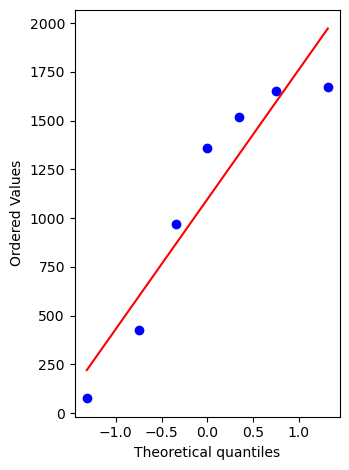

Shapiro-Wilk Test Statistic: 0.8712141764683412, p-value: 0.19021639655485645
The data is normally distributed (fail to reject H0).


In [61]:
#Are the numbers normally distributed?
data=df_7_dis_sum['dis'].copy()

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

In [63]:
# t-test for df_10_percent_dis
data = df_7_dis_sum['dis'].copy()
name = df_7_dis_sum['index'].copy()

# Function to perform one-sample t-test
def perform_ttest(value):
    t_stat, p_value = stats.ttest_1samp(data, value)
    return (value, t_stat, p_value)

# Use reduce to apply the t-test to each value in the data
results = [perform_ttest(value) for value in data]

# Print results
num=0
for value, t_stat, p_value in results:
    print(f"For {name[num]}")
    print(f"Comparing value {value} against the group mean:")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    num+=1
    
    if p_value > 0.05:
        print("  Fail to reject the null hypothesis (H0): Not significantly different from the mean.\n")
    else:
        print("  Reject the null hypothesis (H0): Significantly different from the mean.\n")

For 1-7
Comparing value 77 against the group mean:
  t-statistic: 4.2754
  p-value: 0.0052
  Reject the null hypothesis (H0): Significantly different from the mean.

For 8-14
Comparing value 429 against the group mean:
  t-statistic: 2.8002
  p-value: 0.0312
  Reject the null hypothesis (H0): Significantly different from the mean.

For 15-21
Comparing value 969 against the group mean:
  t-statistic: 0.5370
  p-value: 0.6106
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 22-28
Comparing value 1361 against the group mean:
  t-statistic: -1.1058
  p-value: 0.3112
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 29-35
Comparing value 1674 against the group mean:
  t-statistic: -2.4176
  p-value: 0.0520
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 36-42
Comparing value 1517 against the group mean:
  t-statistic: -1.7596
  p-value: 0.1290
  Fail to reject the nu

Group 29-35 appear significantly more in drawing

Group 36-42 appear significantly lesser in drawing

## Grouping the numbers according to their initial positions
Would the initial position of the numbers be a factor on the drawing outcome?

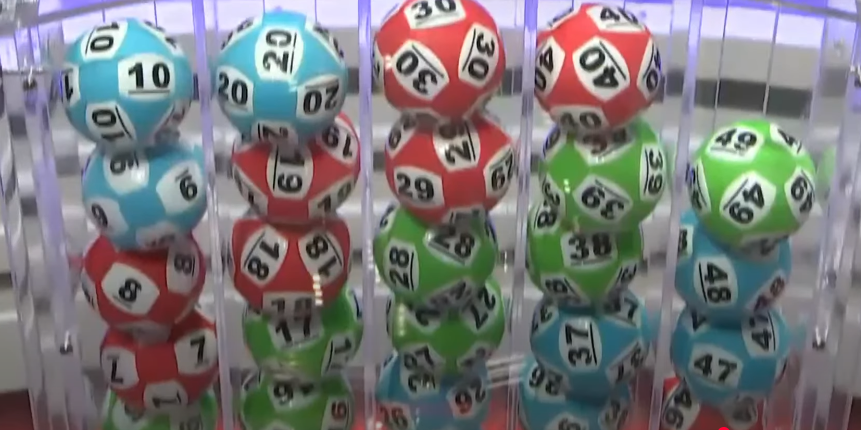

### Grouping the numbers in row (horizontally)

In [23]:
df_row_dis=df_1sthalf.copy()
df_row_dis['1_row'] = (df_row_dis.iloc[:, 2:8] % 10 == 0).sum(axis=1)

# Create a list of row suffixes and a corresponding list of target values
suffixes = range(2, 11)  # for 2_row to 10_row
targets = [9, 8, 7, 6, 5, 4, 3, 2, 1]  # corresponding values for each row

for suffix, target in zip(suffixes, targets):
    condition = df_row_dis.iloc[:, 2:8].isin([target + 10*i for i in range(0, 5)])
    df_row_dis[f'{suffix}_row'] = condition.sum(axis=1)

In [77]:
df_row_dis

Draw        Date   1   2   3   4   5   6  Extra Number From Last  ...  \
0     25/011  2025-02-02  14  18  30  36  40  42             1     14,36  ...   
1     25/010  2025-01-25   7  14  19  31  36  45            24         0  ...   
2     25/009  2025-01-23   3   6  24  25  34  37            45         0  ...   
3     25/008  2025-01-21  16  22  33  43  48  49             8         0  ...   
4     25/007  2025-01-18   3   4   6  12  18  32            28       3,4  ...   
...      ...         ...  ..  ..  ..  ..  ..  ..           ...       ...  ...   
1915  11/005  2011-01-11   1   2  29  37  42  48            38         0  ...   
1916  11/004  2011-01-08  10  12  18  21  27  33             4         0  ...   
1917  11/003  2011-01-06   4   7  14  15  19  26            43         4  ...   
1918  11/002  2011-01-04   4   9  16  20  38  39            40     20,39  ...   
1919  11/001  2011-01-02   1  13  20  24  37  39             3  13,20,39  ...   

      1_row  2_row  3_row  4_row  5_row  6_row  7_row  8_row  9_row  10_row  
0         2      0      1      0      1      0      1      0      1       0  
1         0      1      0      1      1      1      1      0      0       1  
2         0      0      0      1      1      1      2      1      0       0  
3         0      1      1      0      1      0      0      2      1       0  
4         0      0      1      0      1      0      1      1      2       0  
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...  
1915      0      1      1      1      0      0      0      0      2       1  
1916      1      0      1      1      0      0      0      1      1       1  
1917      0      1      0      1      1      1      2      0      0       0  
1918      1      2      1      0      1      0      1      0      0       0  
1919      1      1      0      1      0      0      1      1      0       1  

[1920 rows x 29 columns]

In [108]:
df_row_dis=df_row_dis.iloc[:,19:29].sum()
df_row_dis=df_row_dis.reset_index(name='dis')

In [109]:
#because 1_row has only 4 numbers, therefore need to do some manipulation
df_row_dis['dis'][0]=df_row_dis['dis'][0]/4
df_row_dis['dis'][1:]=df_row_dis['dis'][1:]/5

C:\Users\user\AppData\Local\Temp\ipykernel_14404\32392964.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_row_dis['dis'][0]=df_row_dis['dis'][0]/4
C:\Users\user\AppData\Local\Temp\ipykernel_14404\32392964.py:2: SettingWithCopyWarning:

In [110]:
df_row_dis

index     dis
0   1_row  241.75
1   2_row  231.80
2   3_row  238.00
3   4_row  228.80
4   5_row  230.60
5   6_row  226.00
6   7_row  248.60
7   8_row  232.60
8   9_row  240.40
9  10_row  233.80

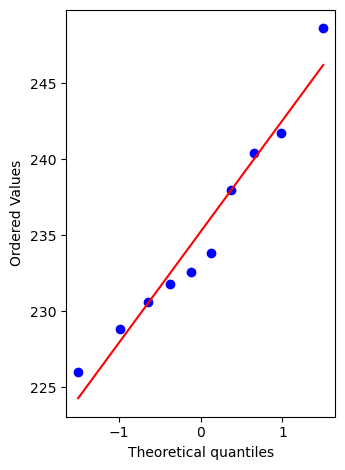

Shapiro-Wilk Test Statistic: 0.9554493089000379, p-value: 0.7330013208598682
The data is normally distributed (fail to reject H0).


In [111]:
#Are the numbers normally distributed?
data = df_row_dis['dis']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

In [112]:
# t-test for df_row_dis
data = df_row_dis['dis']
name = df_row_dis['index']

# Function to perform one-sample t-test
def perform_ttest(value):
    t_stat, p_value = stats.ttest_1samp(data, value)
    return (value, t_stat, p_value)

# Use reduce to apply the t-test to each value in the data
results = [perform_ttest(value) for value in data]

# Print results
num=0
for value, t_stat, p_value in results:
    print(f"For {name[num]}")
    print(f"Comparing value {value} against the group mean:")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    num+=1
    
    if p_value > 0.05:
        print("  Fail to reject the null hypothesis (H0): Not significantly different from the mean.\n")
    else:
        print("  Reject the null hypothesis (H0): Significantly different from the mean.\n")

For 1_row
Comparing value 241.75 against the group mean:
  t-statistic: -3.0003
  p-value: 0.0149
  Reject the null hypothesis (H0): Significantly different from the mean.

For 2_row
Comparing value 231.8 against the group mean:
  t-statistic: 1.5819
  p-value: 0.1481
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 3_row
Comparing value 238.0 against the group mean:
  t-statistic: -1.2733
  p-value: 0.2348
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 4_row
Comparing value 228.8 against the group mean:
  t-statistic: 2.9634
  p-value: 0.0159
  Reject the null hypothesis (H0): Significantly different from the mean.

For 5_row
Comparing value 230.6 against the group mean:
  t-statistic: 2.1345
  p-value: 0.0616
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 6_row
Comparing value 226.0 against the group mean:
  t-statistic: 4.2529
  p-value: 0.0021
  Reject t

1_row appear significantly more in draws

4_row appear significantly lesser in draws

6_row appear significantly lesser in draws

7_row appear significantly lesser in draws

9_row appear significantly more in draws

### Grouping the numbers in column (vertically)

In [24]:
df_10_dis=pd.DataFrame()
df_10_dis=df_1sthalf.iloc[:,14:19].sum()
df_10_dis=df_10_dis.reset_index(name='dis')
df_10_dis

index   dis
0   1-10  2339
1  11-20  2377
2  21-30  2394
3  31-40  2331
4  41-50  2079

In [103]:
#because 41-50 has only 9 numbers, therefore need to do some manipulation
df_10_dis['dis'][4]=df_10_dis['dis'][4]/9
df_10_dis['dis'][:4]=df_10_dis['dis'][:4]/10
df_10_dis

C:\Users\user\AppData\Local\Temp\ipykernel_14404\1147635588.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_10_dis['dis'][4]=df_10_dis['dis'][4]/9
C:\Users\user\AppData\Local\Temp\ipykernel_14404\1147635588.py:2: SettingWithCopyWarnin

index    dis
0   1-10  233.9
1  11-20  237.7
2  21-30  239.4
3  31-40  233.1
4  41-50  231.0

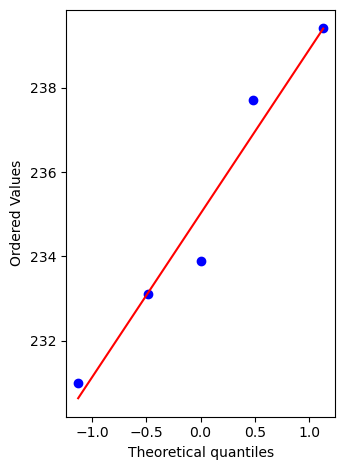

Shapiro-Wilk Test Statistic: 0.9437783754972157, p-value: 0.6927597714479251
The data is normally distributed (fail to reject H0).


In [104]:
#Are the numbers normally distributed?
data = df_10_dis['dis']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

In [105]:
# t-test for df_10_dis
data = df_10_dis['dis']
name = df_10_dis['index']

# Function to perform one-sample t-test
def perform_ttest(value):
    t_stat, p_value = stats.ttest_1samp(data, value)
    return (value, t_stat, p_value)

# Use reduce to apply the t-test to each value in the data
results = [perform_ttest(value) for value in data]

# Print results
num=0
for value, t_stat, p_value in results:
    print(f"For {name[num]}")
    print(f"Comparing value {value} against the group mean:")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    num+=1
    
    if p_value > 0.05:
        print("  Fail to reject the null hypothesis (H0): Not significantly different from the mean.\n")
    else:
        print("  Reject the null hypothesis (H0): Significantly different from the mean.\n")

For 1-10
Comparing value 233.9 against the group mean:
  t-statistic: 0.7270
  p-value: 0.5075
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 11-20
Comparing value 237.7 against the group mean:
  t-statistic: -1.7396
  p-value: 0.1569
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 21-30
Comparing value 239.4 against the group mean:
  t-statistic: -2.8431
  p-value: 0.0467
  Reject the null hypothesis (H0): Significantly different from the mean.

For 31-40
Comparing value 233.1 against the group mean:
  t-statistic: 1.2463
  p-value: 0.2807
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 41-50
Comparing value 231.0 against the group mean:
  t-statistic: 2.6094
  p-value: 0.0595
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.



### Grouping by the colour of the balls (slope position)

In [ ]:
# Define RGB sets
R = {1, 2, 12, 13, 23, 24, 34, 35, 45, 46, 7, 8, 18, 19, 29, 30, 40}
G = {11, 21, 22, 32, 33, 43, 44, 5, 6, 16, 17, 27, 28, 38, 39, 49}
B = {41, 31, 42, 3, 4, 14, 15, 25, 26, 36, 37, 47, 48, 9, 10, 20}

len(R), len(G), len(B)

(17, 16, 16)

In [ ]:
df_colour = df_cols.copy()

# Initialize new columns
df_colour['R'] = 0
df_colour['G'] = 0
df_colour['B'] = 0

# Count frequency of RGB values
for index, row in df_colour.iterrows():
    for value in row:
        if value in R:
            df_colour.at[index, 'R'] += 1
        if value in G:
            df_colour.at[index, 'G'] += 1
        if value in B:
            df_colour.at[index, 'B'] += 1

df_colour

1   2   3   4   5   6  R  G  B
0     14  18  30  36  40  42  3  0  3
1      7  14  19  31  36  45  3  0  3
2      3   6  24  25  34  37  2  1  3
3     16  22  33  43  48  49  0  5  1
4      3   4   6  12  18  32  2  2  2
...   ..  ..  ..  ..  ..  .. .. .. ..
1915   1   2  29  37  42  48  3  0  3
1916  10  12  18  21  27  33  2  3  1
1917   4   7  14  15  19  26  2  0  4
1918   4   9  16  20  38  39  0  3  3
1919   1  13  20  24  37  39  3  1  2

[1920 rows x 9 columns]

In [ ]:
#R has one more ball than G and B, so manipulation is needed
R_count=df_colour['R'].sum()/17
G_count=df_colour['G'].sum()/16
B_count=df_colour['B'].sum()/16

R_count, G_count, B_count

(np.float64(238.76470588235293), np.float64(236.0), np.float64(230.3125))

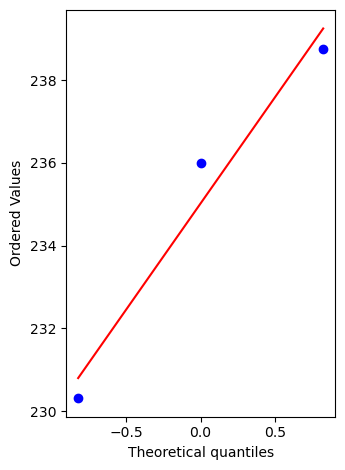

Shapiro-Wilk Test Statistic: 0.9616681064817878, p-value: 0.6236465419262958
The data is normally distributed (fail to reject H0).


In [ ]:
#Are the numbers normally distributed?
data=[R_count, G_count, B_count]

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

21-30 appear signifcantly more in draws

## Last draw winning number

In [50]:
df_fromlast=df_1sthalf['From Last'].value_counts().reset_index()
df_fromlast

From Last  count
0          32     26
1           8     24
2          12     23
3          47     21
4          18     21
..        ...    ...
309  33,36,49      1
310     23,34      1
311  15,30,49      1
312      1,22      1
313  13,20,39      1

[314 rows x 2 columns]

In [51]:
#merge the data that is calculated together, such as 30,32 and 12,39,49
data = df_fromlast.copy()

# Initialize a list to store the new rows
new_rows = []

# Iterate through each row in the original DataFrame
for index, row in data.iterrows():
    # Split the numbers by comma
    numbers = row['From Last'].split(',')
    count = row['count']
    
    # Create a new entry for each number
    for number in numbers:
        new_rows.append({'From Last': number.strip(), 'count': count})

# Create a new DataFrame from the list of new rows
result = pd.DataFrame(new_rows)

# Group by numbers and sum the times
result = result.groupby('From Last', as_index=False).sum().sort_values(by='count', ascending=False)

# Display the result
print(result)

   From Last  count
4         13     37
16        24     37
3         12     37
9         18     37
27        34     37
25        32     37
47         8     36
5         14     35
7         16     34
20        28     34
13        21     34
30        37     34
33         4     34
2         11     33
22         3     33
26        33     32
12        20     32
24        31     32
38        44     32
40        46     31
43        49     31
37        43     30
39        45     30
8         17     30
23        30     29
41        47     29
17        25     29
0          1     28
29        36     28
28        35     26
10        19     26
46         7     26
45         6     26
6         15     25
19        27     25
36        42     25
15        23     25
42        48     25
32        39     24
1         10     24
11         2     24
48         9     23
14        22     22
21        29     22
31        38     22
18        26     21
35        41     17
34        40     16
44         5     11


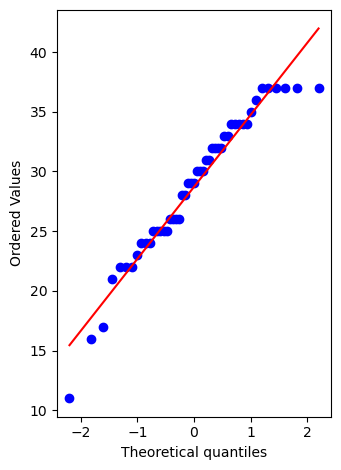

Shapiro-Wilk Test Statistic: 0.9487463280847735, p-value: 0.032868731750978486
The data is normally distributed (fail to reject H0).


In [52]:
#Are the numbers normally distributed?
data = result['count']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

In [53]:
mean = np.mean(result['count'])
std_dev = np.std(result['count'])

mean, std_dev

(np.float64(28.714285714285715), 5.969309261650338)

In [54]:
#since the numbers are normally distributed, we can then calculate z-score to see if there are any numbers have a significant difference
result['z-score']=result['count'].apply(lambda x: (x - mean)/std_dev)
result['z-score alpha 0.05']=result['z-score'].apply(lambda x: 1 if abs(x) > 1.645 else 0)
sign_diff_num=result[result['z-score alpha 0.05']==1]

print("The numbers that have a significant difference, with alpha = 0.05, are", *sign_diff_num['From Last'], sep=' ')

The numbers that have a significant difference, with alpha = 0.05, are 41 40 5


In [55]:
#what if the extra number was included?

Some numbers do have a high chance on repeating itself from draws, could it be the tiny different from the weight or the shape of the balls that cause these minor differences?

## What about the frequency of each numbers?

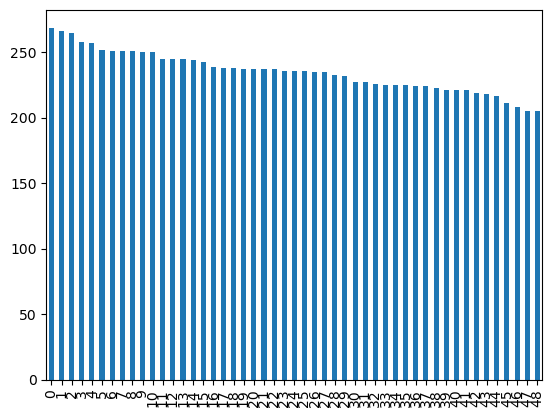

In [56]:
#the percentage distribution of each number
df_number_valuecounts=[df_1sthalf['1'].value_counts(),df_1sthalf['2'].value_counts(),df_1sthalf['3'].value_counts(),df_1sthalf['4'].value_counts(),df_1sthalf['5'].value_counts(),df_1sthalf['6'].value_counts()]
result_reduce=reduce(lambda x,y: x.add(y, fill_value=0), df_number_valuecounts)
percent_dis=(result_reduce).sort_values(ascending=False)
percent_dis=percent_dis.reset_index()
percent_dis.columns = ['number','count']
percent_dis['count'].plot.bar()

plt.show()

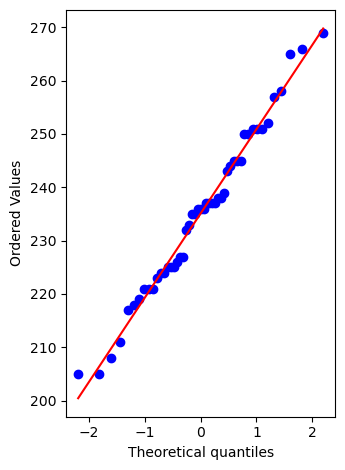

Shapiro-Wilk Test Statistic: 0.9806177414582298, p-value: 0.5914013517624389
The data is normally distributed (fail to reject H0).


In [57]:
#Are the numbers normally distributed?
data = percent_dis['count']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

In [58]:
#since the numbers are normally distributed, we can then calculate z-score to see if there are any numbers have a significant difference
data = percent_dis.copy()
mean = np.mean(percent_dis['count'])
std = np.std(percent_dis['count'])

data['z-score']=data['count'].apply(lambda x: ( x - mean)/std)
data['z-score alpha 0.05']=data['z-score'].apply(lambda x: 1 if abs(x) > 1.645 else 0)
sign_diff_num=data[data['z-score alpha 0.05']==1]

print("The numbers that have a significant difference, with alpha = 0.05, are", *sign_diff_num['number'], sep=' ')

The numbers that have a significant difference, with alpha = 0.05, are 30 49 34 41 5 19


In [59]:
percent_dis

number  count
0       30  269.0
1       49  266.0
2       34  265.0
3       28  258.0
4       24  257.0
5       20  252.0
6       32  251.0
7       12  251.0
8        1  251.0
9       33  250.0
10      18  250.0
11      44  245.0
12       2  245.0
13      21  245.0
14       4  244.0
15      16  243.0
16      47  239.0
17      46  238.0
18      11  238.0
19      15  237.0
20       3  237.0
21      35  237.0
22      22  237.0
23       9  236.0
24      13  236.0
25       8  236.0
26      10  235.0
27      29  235.0
28      17  233.0
29      14  232.0
30      31  227.0
31       7  227.0
32      25  226.0
33      45  225.0
34      26  225.0
35      38  225.0
36      36  224.0
37      37  224.0
38       6  223.0
39      48  221.0
40      23  221.0
41      27  221.0
42      43  219.0
43      42  218.0
44      39  217.0
45      40  211.0
46      41  208.0
47       5  205.0
48      19  205.0

In [60]:
percent_dis['count'].sum()

np.float64(11520.0)

## Would it be possible that, for some reasons, some numbers were only drawn to a certain position? 

### PS. This finding was later found to be flawed, unfortunely, the lottery results were always sorted, thus the position of the balls was not provided. I am still keeping this as a record for educational purpose 13/02/2025

In [61]:
print(df_1sthalf.iloc[:,2].value_counts(),
df_1sthalf.iloc[:,3].value_counts(),
df_1sthalf.iloc[:,4].value_counts(),
df_1sthalf.iloc[:,5].value_counts(),
df_1sthalf.iloc[:,6].value_counts(),
df_1sthalf.iloc[:,7].value_counts())

1
1     251
2     214
3     186
4     165
7     121
5     117
6     115
8     105
9      98
10     88
11     75
12     67
14     52
13     50
15     36
16     29
18     26
17     23
21     20
22     17
20     16
19     11
23      8
26      7
24      6
25      4
27      3
28      2
33      2
29      2
30      2
31      1
32      1
Name: count, dtype: int64 2
14    111
12    102
10    100
13     99
8      98
11     97
6      94
9      93
16     92
18     92
15     86
17     81
20     76
5      74
7      71
4      68
21     56
19     52
24     48
3      48
23     43
25     42
22     37
2      31
26     29
27     20
28     18
29     14
30     11
32     10
34      6
36      5
31      5
33      4
37      3
35      2
38      1
39      1
Name: count, dtype: int64 3
24    97
22    89
16    87
21    86
15    86
20    85
19    84
28    81
18    77
17    77
23    76
26    75
25    70
12    66
30    65
13    65
29    60
27    58
31    55
11    53
14    48
32    45
9     39
10    37
33    35
34    3

In [62]:
df = df_1sthalf.iloc[:, 2:8]

# Use value_counts and unstack to get counts of each number in each column
value_counts = df.apply(pd.Series.value_counts).fillna(0)

# Now we can filter based on the number of columns a number appears in
results = {}

# Iterate through the counts of columns (1 to 6)
for num_columns in range(1, 7):
    # Get numbers that appear in exactly `num_columns` different columns
    filtered_numbers = (value_counts > 0).sum(axis=1)

    # Extract the numbers that appear in the specified number of columns
    numbers = filtered_numbers[filtered_numbers == num_columns].index.tolist()
    
    # Store the results with their respective columns
    results[num_columns] = {
        number: list(df.columns[df.eq(number).any()]) for number in numbers
    }

# Print results
for n in range(1, 7):
    print(f"\nNumbers that appear in {n} columns:")
    for number, columns in results[n].items():
        print(f"Number: {number}, Columns: {columns}")


Numbers that appear in 1 columns:
Number: 1, Columns: ['1']
Number: 49, Columns: ['6']

Numbers that appear in 2 columns:
Number: 2, Columns: ['1', '2']
Number: 48, Columns: ['5', '6']

Numbers that appear in 3 columns:
Number: 3, Columns: ['1', '2', '3']
Number: 43, Columns: ['4', '5', '6']
Number: 45, Columns: ['4', '5', '6']
Number: 46, Columns: ['4', '5', '6']
Number: 47, Columns: ['4', '5', '6']

Numbers that appear in 4 columns:
Number: 4, Columns: ['1', '2', '3', '4']
Number: 5, Columns: ['1', '2', '3', '4']
Number: 6, Columns: ['1', '2', '3', '4']
Number: 40, Columns: ['3', '4', '5', '6']
Number: 41, Columns: ['3', '4', '5', '6']
Number: 42, Columns: ['3', '4', '5', '6']
Number: 44, Columns: ['3', '4', '5', '6']

Numbers that appear in 5 columns:
Number: 7, Columns: ['1', '2', '3', '4', '5']
Number: 8, Columns: ['1', '2', '3', '4', '5']
Number: 9, Columns: ['1', '2', '3', '4', '5']
Number: 11, Columns: ['1', '2', '3', '4', '5']
Number: 12, Columns: ['1', '2', '3', '4', '5']
Nu

Some numbers only would be drew in certain positions, since 2008

for eg.

number 1 would only appear in the 1st draw

number49 would only appear in the 6th draw

## What about numbers that appear next to each other numerically in the same lottery draw?

In [37]:
#the results would have around 67k rows, it might take a bit more time.

df=df_1sthalf.iloc[::,2:8]

# List to store all combinations
all_combinations = []

# Iterate through each row and collect combinations of sizes 2, 3, 4, and 5
for index, row in df.iterrows():
    for size in range(2, 7):  # Sizes 2, 3, 4, 5 and 6
        comb = combinations(sorted(row), size)
        all_combinations.extend(comb)

# Count occurrences using Counter
counts = Counter(all_combinations)

# Filter combinations that appear more than once
filtered_counts = pd.DataFrame(counts.items(), columns=['Combination', 'Count'])
#filtered_counts = filtered_counts[filtered_counts['Count'] > 1]

# Display the resulting DataFrame
filtered_counts=filtered_counts.sort_values(by='Count', ascending=False)
filtered_counts

Combination  Count
943                   (21, 49)     44
4019                  (30, 34)     44
2820                  (18, 28)     40
996                   (24, 44)     39
2293                  (21, 47)     39
...                        ...    ...
25232          (3, 21, 31, 35)      1
25233         (10, 21, 31, 35)      1
25234       (2, 3, 10, 21, 31)      1
25235       (2, 3, 10, 21, 35)      1
57605  (1, 13, 20, 24, 37, 39)      1

[57606 rows x 2 columns]

In [38]:
#categorise them into combinations with different length (2,3,4,5,6)
df = filtered_counts.copy()
df_length_2 = df[df['Combination'].apply(lambda x: len(x) == 2)]
df_length_3 = df[df['Combination'].apply(lambda x: len(x) == 3)]
df_length_4 = df[df['Combination'].apply(lambda x: len(x) == 4)]
df_length_5 = df[df['Combination'].apply(lambda x: len(x) == 5)]
df_length_6 = df[df['Combination'].apply(lambda x: len(x) == 6)]

### Combinations with 2 numbers

In [42]:
len(df_length_2), df_length_2['Count'].max(), df_length_2['Count'].min()

(1176, 44, 8)

In [43]:
#Are the numbers normally distributed?
data = df_length_2['Count']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

NameError: name 'plt' is not defined

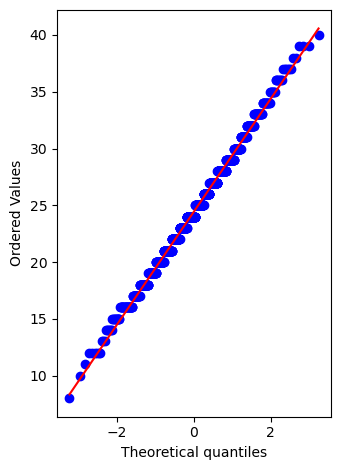

Shapiro-Wilk Test Statistic: 0.9952669882722133, p-value: 0.0010002023319366509
The data is not normally distributed (reject H0).


In [67]:
#Q-Q plot looks like a normal distribution, could it be the outlier to make the Shapiro-Wilk reject H0?
df_length_2_no_outlier=df_length_2[df_length_2['Count'] <= 40]

#Are the numbers normally distributed?
data = df_length_2_no_outlier['Count']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

In [40]:
#while it is better if the data is normally distributed, we can still the z-score to see if there are any numbers have a significant difference
data = df_length_2.copy()
mean = np.mean(df_length_2['Count'])
std = np.std(df_length_2['Count'])

data['z-score']=data['Count'].apply(lambda x: ( x - mean)/std)
data['z-score alpha 0.05']=data['z-score'].apply(lambda x: 1 if abs(x) > 1.645 else 0)
sign_diff_num=data[data['z-score alpha 0.05']==1]
higher_chance = sign_diff_num[sign_diff_num['z-score'] > 1.645]
lower_chance = sign_diff_num[sign_diff_num['z-score'] < -1.645]

print(f"The max count for combinations of 2 numbers are {df_length_2['Count'].max()}, while the min count is {df_length_2['Count'].min()}.")
print(f"There are {len(df_length_2)} combinations of 2 numbers. Out of these, {len(higher_chance)} combinations have a significantly higher likelihood of being drawn, \
while {len(lower_chance)} combinations have a significantly lower likelihood.")

The max count for combinations of 2 numbers are 44, while the min count is 8.
There are 1176 combinations of 2 numbers. Out of these, 71 combinations have a significantly higher likelihood of being drawn, while 64 combinations have a significantly lower likelihood.


### Combinations with 3 numbers

In [69]:
len(df_length_3), df_length_3['Count'].max(), df_length_3['Count'].min()

(16078, 11, 1)

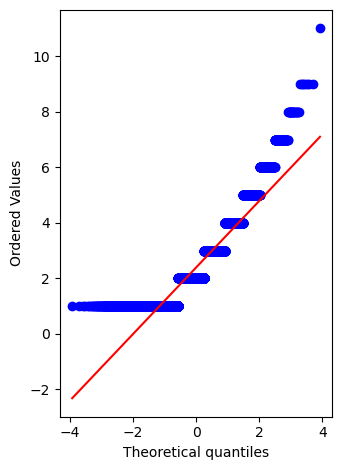

Anderson-Darling Test statistic: 686.2720168922788
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]
Data is not normally distributed (reject H0)


In [70]:
#Are the numbers normally distributed?
data = df_length_3['Count']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Anderson-Darling Test since n > 5000
result = stats.anderson(data, dist='norm')
print('Anderson-Darling Test statistic:', result.statistic)
print('Critical values:', result.critical_values)
print('Significance levels:', result.significance_level)

if result.statistic > result.critical_values[2]:
    print("Data is not normally distributed (reject H0)")
else:
    print("Data is normally distributed (failed to reject H0)")

In [267]:
#while it is better if the data is normally distributed, we can still the z-score to see if there are any numbers have a significant difference
#Since df_length_3['Count'] == 1 is a lot more than the rest, which cause a very uneven distribution, therefore, we will filter them out.
df_length_3_no_outlier=df_length_3[df_length_3['Count'] > 1]
data = df_length_3_no_outlier.copy()
mean = np.mean(df_length_3_no_outlier['Count'])
std = np.std(df_length_3_no_outlier['Count'])

data['z-score']=data['Count'].apply(lambda x: ( x - mean)/std)
data['z-score alpha 0.05']=data['z-score'].apply(lambda x: 1 if abs(x) > 1.645 else 0)
sign_diff_num=data[data['z-score alpha 0.05']==1]
higher_chance = sign_diff_num[sign_diff_num['z-score'] > 1.645]
lower_chance = sign_diff_num[sign_diff_num['z-score'] < -1.645]

print(f"The max count for combinations of 3 numbers are {data['Count'].max()}, while the min count is {data['Count'].min()}.")
print(f"There are {len(data)} combinations of 2 numbers. Out of these, {len(higher_chance)} combinations have a significantly higher likelihood of being drawn, \
while {len(lower_chance)} combinations have a significantly lower likelihood.")

The max count for combinations of 3 numbers are 11, while the min count is 2.
There are 11454 combinations of 2 numbers. Out of these, 1098 combinations have a significantly higher likelihood of being drawn, while 0 combinations have a significantly lower likelihood.


It seems we require significantly more data to include combinations of three as a feature. A dataset should contain values that are both higher and lower likelihood, instead, we just have values that have a significantly higher likelihood, which could be misleading, as it might suggest the whole dataset has not reached it's "true mean" yet.

### Combination with 4 numbers

In [71]:
len(df_length_4), df_length_4['Count'].max(), df_length_4['Count'].min()

(26945, 4, 1)

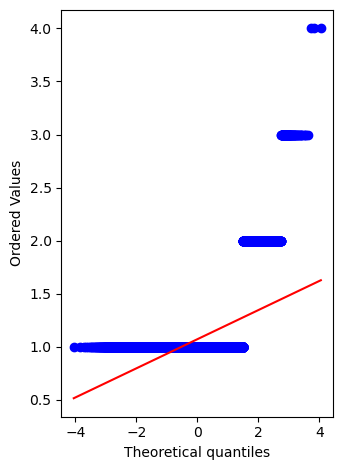

Anderson-Darling Test statistic: 9325.29996214866
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]
Data is not normally distributed (reject H0)


In [72]:
#Are the numbers normally distributed?
data = df_length_4['Count']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Anderson-Darling Test since n > 5000
result = stats.anderson(data, dist='norm')
print('Anderson-Darling Test statistic:', result.statistic)
print('Critical values:', result.critical_values)
print('Significance levels:', result.significance_level)

if result.statistic > result.critical_values[2]:
    print("Data is not normally distributed (reject H0)")
else:
    print("Data is normally distributed (failed to reject H0)")

### Combination with 5 and 6 numbers

In [73]:
len(df_length_5), df_length_5['Count'].max(), df_length_5['Count'].min()

(11487, 2, 1)

In [74]:
len(df_length_6), df_length_6['Count'].max(), df_length_6['Count'].min()

(1920, 1, 1)

It seems that only combinations of two numbers have sufficient data to establish a normal distribution. Combinations of three numbers are beginning to show a pattern, but there isn't enough data to form a normal distribution. Perhaps in another 50 years, they may develop a normal distribution suitable for analysis. The same applies to combinations of four, five, and six numbers.

## Consecutive numbers

In [44]:
df = df_1sthalf.iloc[:,2:8]

def check_consecutive_numbers_in_row(row):
    # Sort the numbers in the row
    sorted_numbers = sorted(row)
    consecutive_sequences = []
    current_sequence = [sorted_numbers[0]]

    for i in range(1, len(sorted_numbers)):
        if sorted_numbers[i] == sorted_numbers[i - 1] + 1:
            current_sequence.append(sorted_numbers[i])
        else:
            if len(current_sequence) > 1:
                consecutive_sequences.append(current_sequence)
            current_sequence = [sorted_numbers[i]]

    if len(current_sequence) > 1:
        consecutive_sequences.append(current_sequence)

    return consecutive_sequences

# Apply the function to each row in the DataFrame
df['consecutive_sequences'] = df.apply(check_consecutive_numbers_in_row, axis=1)

# Drop rows where consecutive_sequences is an empty list
df = df[df['consecutive_sequences'].str.len() > 0]

# Extract all sequences into a list of lists, preserving combinations
all_consecutive_sequences = []

for sequences in df['consecutive_sequences']:
    if sequences:  # Check if not empty
        all_consecutive_sequences.append(sequences)

# Flatten the list of lists to a 1D array, preserving existing combinations
flattened_sequences = [seq for sublist in all_consecutive_sequences for seq in sublist]

# Count occurrences of each sub-array (tuple)
counted = Counter(tuple(sublist) for sublist in flattened_sequences)
counted

Counter({(48, 49): 31,
         (34, 35): 31,
         (11, 12): 28,
         (1, 2): 28,
         (32, 33): 27,
         (7, 8): 27,
         (17, 18): 25,
         (38, 39): 24,
         (20, 21): 24,
         (33, 34): 23,
         (29, 30): 23,
         (3, 4): 22,
         (5, 6): 22,
         (19, 20): 22,
         (12, 13): 22,
         (24, 25): 21,
         (23, 24): 21,
         (46, 47): 21,
         (27, 28): 21,
         (30, 31): 21,
         (10, 11): 21,
         (26, 27): 20,
         (43, 44): 20,
         (45, 46): 20,
         (41, 42): 20,
         (2, 3): 19,
         (37, 38): 19,
         (47, 48): 19,
         (25, 26): 19,
         (4, 5): 19,
         (36, 37): 18,
         (28, 29): 18,
         (14, 15): 18,
         (44, 45): 18,
         (31, 32): 18,
         (15, 16): 18,
         (22, 23): 17,
         (8, 9): 17,
         (35, 36): 17,
         (21, 22): 17,
         (18, 19): 16,
         (42, 43): 16,
         (9, 10): 16,
         (16, 17): 16,
   

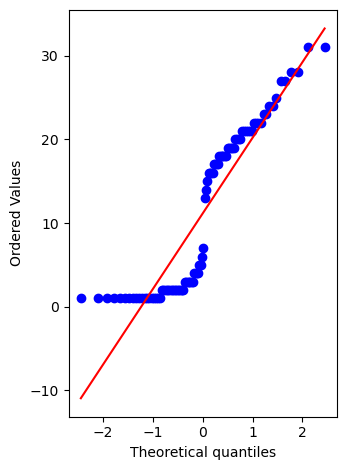

Shapiro-Wilk Test Statistic: 0.8361404629431242, p-value: 6.3428112950157326e-09
The data is not normally distributed (reject H0).


In [144]:
#Are the numbers normally distributed?
count = list(counted.values())
data = count.copy()

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

It seems the data is not normally distributed with values <= 15, let's try to drop them.

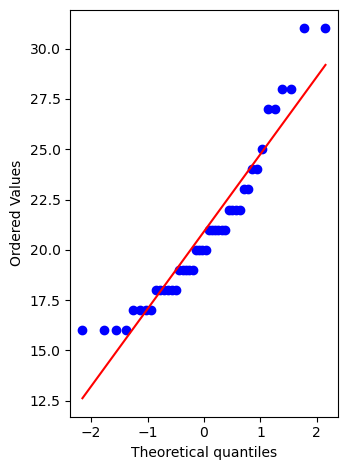

Shapiro-Wilk Test Statistic: 0.9065845050062264, p-value: 0.0017452129228232207
The data is not normally distributed (reject H0).


In [145]:
#Are the numbers normally distributed?
#drop values that are smaller than 15
count = [num for num in count if num > 15]
data = count.copy()

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

Data is still not a normal distribution, let's proceed anyway.

In [45]:
df_conse_num=pd.DataFrame()
df_conse_num['Consecutive_numbers']=list(counted)
df_conse_num['Count']=list(counted.values())
df_conse_num=df_conse_num.sort_values(by='Count', ascending=False)
df_conse_num

Consecutive_numbers  Count
1             (48, 49)     31
39            (34, 35)     31
3             (11, 12)     28
14              (1, 2)     28
12            (32, 33)     27
..                 ...    ...
67        (2, 3, 4, 5)      1
64           (7, 8, 9)      1
30        (28, 29, 30)      1
52        (37, 38, 39)      1
95    (44, 45, 46, 47)      1

[96 rows x 2 columns]

In [179]:
#Still not normally distributed, perform z-score nevertheless to see if there are any numbers have a significant difference
data = df_conse_num.copy()
mean = np.mean(df_conse_num['Count'])
std = np.std(df_conse_num['Count'])

data['z-score']=data['Count'].apply(lambda x: ( x - mean)/std)
data['z-score alpha 0.05']=data['z-score'].apply(lambda x: 1 if abs(x) > 1.645 else 0)
sign_diff_num=data[data['z-score alpha 0.05']==1]
higher_chance = sign_diff_num[sign_diff_num['z-score'] > 0]
lower_chance = sign_diff_num[sign_diff_num['z-score'] < 0]

print(f"The max count for consecutive numbers is {data['Count'].max()}, while the min count is {data['Count'].min()}.")
print(f"There are {len(data)} consecutive numbers in total. Of these, {len(higher_chance)} consecutive numbers have a significantly higher likelihood of being drawn, \
while {len(lower_chance)} combinations have a significantly lower likelihood.")

The max count for consecutive numbers is 31, while the min count is 1.
There are 96 consecutive numbers in total. Of these, 6 consecutive numbers have a significantly higher likelihood of being drawn, while 0 combinations have a significantly lower likelihood.


In [180]:
sign_diff_num

Consecutive_numbers  Count   z-score  z-score alpha 0.05
1             (48, 49)     31  2.063643                   1
39            (34, 35)     31  2.063643                   1
14              (1, 2)     28  1.751660                   1
3             (11, 12)     28  1.751660                   1
36              (7, 8)     27  1.647665                   1
12            (32, 33)     27  1.647665                   1

## What is the longest interval before a number reappears?

In [86]:
df = df_cols.copy()
num=[]
max_gap_period=[]
for i in range(1,50):
    # Find the indices of the occurrences of 42
    indices = df[df.isin([i])].stack().index.tolist()
    
    # Calculate the maximum distance between the occurrences
    if len(indices) > 1:
        max_distance = max(indices[j][0] - indices[j-1][0] for j in range(1, len(indices)))-1
        num.append(i)
        max_gap_period.append(max_distance)
    else:
        max_distance = 0  # If there's only one occurrence, distance is 0
        num.append(i)
        max_gap_period.append(max_distance)

df_gap_period = pd.DataFrame({'num':num, 'longest interval':max_gap_period})
df_gap_period.sort_values(by='longest interval', ascending=False)

num  longest interval
1     2                71
2     3                70
9    10                63
18   19                63
33   34                61
20   21                59
12   13                58
4     5                56
27   28                55
45   46                55
5     6                54
6     7                53
21   22                52
44   45                50
30   31                50
13   14                49
41   42                49
25   26                49
26   27                48
47   48                48
36   37                47
7     8                46
35   36                46
38   39                46
48   49                45
40   41                45
22   23                44
17   18                43
39   40                42
28   29                42
16   17                42
10   11                41
3     4                40
37   38                40
24   25                40
11   12                39
29   30                39
14   15                38
42   43                37
8     9                37
19   20                37
46   47                36
31   32                35
43   44                34
23   24                33
34   35                33
0     1                31
15   16                31
32   33                30

The longest interval for each number range from 30 - 71 lottery draw.

## The range of winning number (Max - Min in the same lottery draw)

In [87]:
df_max_min = df_cols.copy()
df_max_min['max'] = df_max_min.max(axis=1)
df_max_min['min'] = df_max_min.min(axis=1)
df_max_min['range'] = df_max_min['max'] - df_max_min['min']
df_max_min['range'].max(), df_max_min['range'].min()

(48, 9)

There is not much insight from the range of winning number

# Machine Learning

### Import

In [7]:
from sklearn.datasets import make_classification, make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    hamming_loss,
    precision_score,
    recall_score,
    f1_score,
    jaccard_score,
    coverage_error
)
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer, Binarizer

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
import joblib

### One hot encoded data

Flatten the winning numbers, and have the ML model to guess one number at a time.

#### Data Transformation

In [ ]:
# Flatten the winning numbers, and have the ML model to guess one number at a time.

# Create a DataFrame with the winning numbers
df = df_1sthalf.iloc[:, 2:8].copy()

# Flatten the DataFrame into a single column
flattened = df.melt(value_name='winning_num')['winning_num']

# Reset the index to have a clean DataFrame
flattened_df = flattened.reset_index()

# Display the flattened DataFrame
flattened_df

index  winning_num
0          0           14
1          1            7
2          2            3
3          3           16
4          4            3
...      ...          ...
11515  11515           48
11516  11516           33
11517  11517           26
11518  11518           39
11519  11519           39

[11520 rows x 2 columns]

In [134]:
# Add back low, high, odd, even, 1-7, 8-14, 15-21, 22-28, 29-35, 36-42, 43-49
flattened_df['Low'] = flattened_df['winning_num'].apply(lambda x: 1 if x < 25 else 0)
flattened_df['High'] = flattened_df['winning_num'].apply(lambda x: 1 if x >= 25 else 0)
flattened_df['Odd'] = flattened_df['winning_num'].apply(lambda x: 1 if x % 2 > 0 else 0)
flattened_df['Even'] = flattened_df['winning_num'].apply(lambda x: 1 if x % 2 == 0 else 0)
#1-10, 11-20, 21-30, 31-40, 41-49
flattened_df['1-10'] = flattened_df['winning_num'].apply(lambda x: 1 if x <= 10 else 0)
flattened_df['11-20'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 10) & (x <= 20) else 0)
flattened_df['21-30'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 20) & (x <= 30) else 0)
flattened_df['31-40'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 30) & (x <= 40) else 0)
flattened_df['41-49'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 40) & (x <= 49) else 0)
#1-7, 8-14, 15-21, 22-28, 29-35, 36-42, 43-49
flattened_df['1-7'] = flattened_df['winning_num'].apply(lambda x: 1 if x <= 7 else 0)
flattened_df['8-14'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 7) & (x <= 14) else 0)
flattened_df['15-21'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 14) & (x <= 21) else 0)
flattened_df['22-28'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 21) & (x <= 28) else 0)
flattened_df['29-35'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 28) & (x <= 35) else 0)
flattened_df['36-42'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 35) & (x <= 42) else 0)
flattened_df['43-49'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 42) & (x <= 49) else 0)
# add R,G,B
# Define RGB sets
R = {1, 2, 12, 13, 23, 24, 34, 35, 45, 46, 7, 8, 18, 19, 29, 30, 40}
G = {11, 21, 22, 32, 33, 43, 44, 5, 6, 16, 17, 27, 28, 38, 39, 49}
B = {41, 31, 42, 3, 4, 14, 15, 25, 26, 36, 37, 47, 48, 9, 10, 20}

flattened_df['R'] = flattened_df['winning_num'].apply(lambda x: 1 if x in R else 0)
flattened_df['G'] = flattened_df['winning_num'].apply(lambda x: 1 if x in G else 0)
flattened_df['B'] = flattened_df['winning_num'].apply(lambda x: 1 if x in B else 0)

encoded_df=flattened_df.drop('index',axis=1).copy()
train=encoded_df.values

In [137]:
encoded_df

winning_num  Low  High  Odd  Even  1-10  11-20  21-30  31-40  41-49  \
0               14    1     0    0     1     0      1      0      0      0   
1                7    1     0    1     0     1      0      0      0      0   
2                3    1     0    1     0     1      0      0      0      0   
3               16    1     0    0     1     0      1      0      0      0   
4                3    1     0    1     0     1      0      0      0      0   
...            ...  ...   ...  ...   ...   ...    ...    ...    ...    ...   
11515           48    0     1    0     1     0      0      0      0      1   
11516           33    0     1    1     0     0      0      0      1      0   
11517           26    0     1    0     1     0      0      1      0      0   
11518           39    0     1    1     0     0      0      0      1      0   
11519           39    0     1    1     0     0      0      0      1      0   

       1-7  8-14  15-21  22-28  29-35  36-42  43-49  R  G  B  
0        0     1      0      0      0      0      0  0  0  1  
1        1     0      0      0      0      0      0  1  0  0  
2        1     0      0      0      0      0      0  0  0  1  
3        0     0      1      0      0      0      0  0  1  0  
4        1     0      0      0      0      0      0  0  0  1  
...    ...   ...    ...    ...    ...    ...    ... .. .. ..  
11515    0     0      0      0      0      0      1  0  0  1  
11516    0     0      0      0      1      0      0  0  1  0  
11517    0     0      0      1      0      0      0  0  0  1  
11518    0     0      0      0      0      1      0  0  1  0  
11519    0     0      0      0      0      1      0  0  1  0  

[11520 rows x 20 columns]

#### ML model

traing KNeighborsClassifier
traing SVC
traing DecisionTreeClassifier
traing RandomForestClassifier
traing AdaBoostClassifier
traing GradientBoostingClassifier
traing GaussianNB
traing LogisticRegression
traing KNeighborsClassifier
traing SVC
traing DecisionTreeClassifier
traing RandomForestClassifier
traing AdaBoostClassifier
traing GradientBoostingClassifier
traing GaussianNB
traing LogisticRegression
traing KNeighborsClassifier
traing SVC
traing DecisionTreeClassifier
traing RandomForestClassifier
traing AdaBoostClassifier
traing GradientBoostingClassifier
traing GaussianNB
traing LogisticRegression
traing KNeighborsClassifier
traing SVC
traing DecisionTreeClassifier
traing RandomForestClassifier
traing AdaBoostClassifier
traing GradientBoostingClassifier
traing GaussianNB
traing LogisticRegression
traing KNeighborsClassifier
traing SVC
traing DecisionTreeClassifier
traing RandomForestClassifier
traing AdaBoostClassifier
traing GradientBoostingClassifier
traing GaussianNB
traing Logi

C:\Users\user\AppData\Local\Temp\ipykernel_14404\4022039999.py:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  log = pd.concat([log, log_entry], ignore_index=True)


<Axes: title={'center': 'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

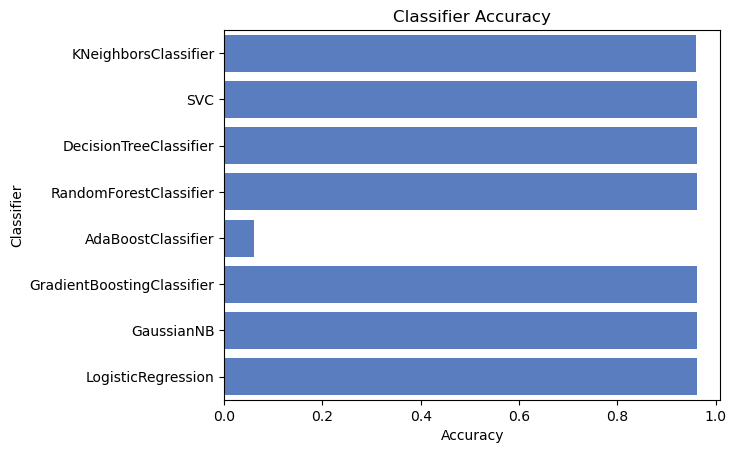

In [149]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    #LinearDiscriminantAnalysis(), for some reaons, this classifier is not working
    #QuadraticDiscriminantAnalysis(), for some reaons, this classifier is not working
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train[0::, 1::]
y = train[0::, 0]

################################## let's try with one classifier first ##################################
"""

clf = LinearDiscriminantAnalysis()

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	print(len(X_train), len(y_train))
	
	clf.fit(X_train, y_train)
	train_predictions = clf.predict(X_test)
	acc = accuracy_score(y_test, train_predictions)
	acc_dict[clf.__class__.__name__] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = pd.concat([log, log_entry], ignore_index=True) 

"""

#########################################################################################################

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		print(f"traing {name}")
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = pd.concat([log, log_entry], ignore_index=True)


plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

Turn out the model has a laughable less than 1% accuracy

### Binarizer to encode

MarkSix rules: guess 6 numbers simutaneously

#### Data Transformation

In [16]:
df = df_cols

# Create a binary DataFrame with 49 columns (0 to 48)
binary_df = pd.DataFrame(0, index=df.index, columns=range(1,50))

# Fill the binary DataFrame based on the values in df
for index, row in df.iterrows():
    for value in row:
        if value <= 49:  # Ensure the value is within the column range
            binary_df.at[index, value] = 1

# Use Binarizer to achieve the same result
binarizer = Binarizer()
binary_array = binarizer.fit_transform(binary_df)

# Convert back to DataFrame for better readability
binary_df_binarizer = pd.DataFrame(binary_array, columns=binary_df.columns)

binary_df_binarizer

1   2   3   4   5   6   7   8   9   10  ...  40  41  42  43  44  45  46  \
0      0   0   0   0   0   0   0   0   0   0  ...   1   0   1   0   0   0   0   
1      0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   1   0   
2      0   0   1   0   0   1   0   0   0   0  ...   0   0   0   0   0   0   0   
3      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
4      0   0   1   1   0   1   0   0   0   0  ...   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
1915   1   1   0   0   0   0   0   0   0   0  ...   0   0   1   0   0   0   0   
1916   0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
1917   0   0   0   1   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
1918   0   0   0   1   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
1919   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

      47  48  49  
0      0   0   0  
1      0   0   0  
2      0   0   0  
3      0   1   1  
4      0   0   0  
...   ..  ..  ..  
1915   0   1   0  
1916   0   0   0  
1917   0   0   0  
1918   0   0   0  
1919   0   0   0  

[1920 rows x 49 columns]

In [17]:
# split From Last, possible feature?
df_split=df_1sthalf['From Last'].str.split(',', expand=True)
df_split=df_split.fillna(0, axis=1).astype(int)
df_split.columns=[f'From_Last{i+1}' for i in range(df_split.shape[1])]
df_split

C:\Users\user\AppData\Local\Temp\ipykernel_14652\3765978601.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_split=df_split.fillna(0, axis=1).astype(int)


From_Last1  From_Last2  From_Last3  From_Last4  From_Last5
0             14          36           0           0           0
1              0           0           0           0           0
2              0           0           0           0           0
3              0           0           0           0           0
4              3           4           0           0           0
...          ...         ...         ...         ...         ...
1915           0           0           0           0           0
1916           0           0           0           0           0
1917           4           0           0           0           0
1918          20          39           0           0           0
1919          13          20          39           0           0

[1920 rows x 5 columns]

In [18]:
# count from last, possible feature?
df_from_last_count=df_split > 0
df_from_last_count[df_from_last_count == True] = 1
df_from_last_count=df_from_last_count[df_from_last_count == 1].sum(axis=1).to_frame(name='From_Last_Count')
df_from_last_count

C:\Users\user\AppData\Local\Temp\ipykernel_14652\1806029290.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_from_last_count[df_from_last_count == True] = 1


From_Last_Count
0                  2
1                  0
2                  0
3                  0
4                  2
...              ...
1915               0
1916               0
1917               1
1918               2
1919               3

[1920 rows x 1 columns]

In [21]:
# group of 7
df_7_group=df_7_dis.iloc[:,6:]
df_7_group

1-7  8-14  15-21  22-28  29-35  36-42  43-49
0       0     0      0      0      1      3      0
1       0     0      1      0      1      1      1
2       0     0      0      2      1      1      0
3       0     0      0      0      1      0      3
4       1     1      1      0      1      0      0
...   ...   ...    ...    ...    ...    ...    ...
1915    0     0      0      0      1      2      1
1916    0     0      2      1      1      0      0
1917    0     1      2      1      0      0      0
1918    0     0      2      0      0      2      0
1919    0     0      1      1      0      2      0

[1920 rows x 7 columns]

In [29]:
# Add row group (balls that are in the same row)
df_row_group = df_row_dis.iloc[:,19:]
df_row_group

1_row  2_row  3_row  4_row  5_row  6_row  7_row  8_row  9_row  10_row
0         2      0      1      0      1      0      1      0      1       0
1         0      1      0      1      1      1      1      0      0       1
2         0      0      0      1      1      1      2      1      0       0
3         0      1      1      0      1      0      0      2      1       0
4         0      0      1      0      1      0      1      1      2       0
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...
1915      0      1      1      1      0      0      0      0      2       1
1916      1      0      1      1      0      0      0      1      1       1
1917      0      1      0      1      1      1      2      0      0       0
1918      1      2      1      0      1      0      1      0      0       0
1919      1      1      0      1      0      0      1      1      0       1

[1920 rows x 10 columns]

In [33]:
# Add colour groups
df_colour_grp = df_colour.iloc[:, 6:]
df_colour_grp

R  G  B
0     3  0  3
1     3  0  3
2     2  1  3
3     0  5  1
4     2  2  2
...  .. .. ..
1915  3  0  3
1916  2  3  1
1917  2  0  4
1918  0  3  3
1919  3  1  2

[1920 rows x 3 columns]

In [46]:
# split consecutive numbers into combinations of 2,3,4,5
df_conse_num_2 = df_conse_num[df_conse_num['Consecutive_numbers'].apply(lambda x: len(x) == 2)]
df_conse_num_3 = df_conse_num[df_conse_num['Consecutive_numbers'].apply(lambda x: len(x) == 3)]
df_conse_num_4 = df_conse_num[df_conse_num['Consecutive_numbers'].apply(lambda x: len(x) == 4)]
df_conse_num_5 = df_conse_num[df_conse_num['Consecutive_numbers'].apply(lambda x: len(x) == 5)]

In [47]:
#consecutive
data_2 = df_conse_num_2['Consecutive_numbers'].to_frame()
data_3 = df_conse_num_3['Consecutive_numbers'].to_frame()
data_4 = df_conse_num_4['Consecutive_numbers'].to_frame()
data_5 = df_conse_num_5['Consecutive_numbers'].to_frame()
df_con_num_count = df_cols.copy()

# Function to count matches
def count_matches(row, df):
    count = 0
    row_nums = set(row)  # Convert row values to set for faster lookup
    for nums in df['Consecutive_numbers']:
        if all(int(num) in row_nums for num in nums):  # Convert tuple values to int
            count += 1
    return count

# Apply the function to each row
df_con_num_count['Con_num_2_Count'] = df_con_num_count.apply(lambda row: count_matches(row, data_2), axis=1)
df_con_num_count['Con_num_3_Count'] = df_con_num_count.apply(lambda row: count_matches(row, data_3), axis=1)
df_con_num_count['Con_num_4_Count'] = df_con_num_count.apply(lambda row: count_matches(row, data_4), axis=1)
df_con_num_count['Con_num_5_Count'] = df_con_num_count.apply(lambda row: count_matches(row, data_5), axis=1)

# Display the updated DataFrame
df_con_num_count = df_con_num_count[['Con_num_2_Count', 'Con_num_3_Count', 'Con_num_4_Count', 'Con_num_5_Count']]
df_con_num_count

Con_num_2_Count  Con_num_3_Count  Con_num_4_Count  Con_num_5_Count
0                   0                0                0                0
1                   0                0                0                0
2                   1                0                0                0
3                   1                0                0                0
4                   1                0                0                0
...               ...              ...              ...              ...
1915                1                0                0                0
1916                0                0                0                0
1917                1                0                0                0
1918                1                0                0                0
1919                0                0                0                0

[1920 rows x 4 columns]

Let's use all consecutive numbers as features first and see how it goes, then later we try filter only the consecutive numbers that are statistically significant and see if it would improve the ML predicition.

In [48]:
#combinations of 2
high_chance_combinations_2 = higher_chance['Combination']
low_chance_combinations_2 = lower_chance['Combination']

df_combination_count = df_cols.copy()

# Function to count matches
def count_matches(row, data):
    count = 0
    row_nums = set(row)  # Convert row values to set for faster lookup
    for nums in data:
        if all(int(num) in row_nums for num in nums):  # Convert tuple values to int
            count += 1
    return count

# Apply the function to each row
df_combination_count['high_chance_combinations_2'] = df_combination_count.apply(lambda row: count_matches(row, high_chance_combinations_2), axis=1)
df_combination_count['low_chance_combinations_2'] = df_combination_count.apply(lambda row: count_matches(row, low_chance_combinations_2), axis=1)
df_combination_count=df_combination_count[['high_chance_combinations_2','low_chance_combinations_2']]
df_combination_count

high_chance_combinations_2  low_chance_combinations_2
0                              3                          0
1                              0                          2
2                              0                          0
3                              0                          0
4                              2                          0
...                          ...                        ...
1915                           0                          0
1916                           3                          0
1917                           1                          1
1918                           1                          1
1919                           0                          1

[1920 rows x 2 columns]

In [49]:
# Add back low, high, odd, even, 1-10, 11-20, 21-30, 31-40, 41-49
binary_df_binarizer[['Low','High','Odd','Even','1-10','11-20','21-30','31-40','41-49']] = df_1sthalf[['Low','High','Odd','Even','1-10','11-20','21-30','31-40','41-50']]
# Add From Last
binary_df_binarizer[['From_last_count']] = df_from_last_count
# Add group of 7
binary_df_binarizer[['1-7','8-14','15-21','22-28','29-35','36-42','43-49']] = df_7_group
# Add row group
binary_df_binarizer[['row_1','row_2','row_3','row_4','row_5','row_6','row_7','row_8','row_9','row_10']] = df_row_group
# Add colour group
binary_df_binarizer[['R','G','B']] = df_colour_grp
# Add consecutive numbers
binary_df_binarizer[['Con_num_2_Count', 'Con_num_3_Count', 'Con_num_4_Count', 'Con_num_5_Count']] = df_con_num_count
# Add combinations of 2
binary_df_binarizer[['high_chance_combinations_2','low_chance_combinations_2']] = df_combination_count

#### ML model

In [276]:
train_x=binary_df_binarizer.iloc[:,50:].values
train_y=binary_df_binarizer.iloc[:,0:49].values

In [ ]:
#we are going to use the train_test_split method because the sequence of the data is important (From Last Draw features)
# Use regular train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=0)

print("Training set shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nTest set shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Training set shapes:
X_train: (1728, 35)
y_train: (1728, 49)

Test set shapes:
X_test: (192, 35)
y_test: (192, 49)


C:\Users\user\AppData\Local\Temp\ipykernel_2668\3178882763.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  log = pd.concat([log, log_entry], ignore_index=True)


<Axes: title={'center': 'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

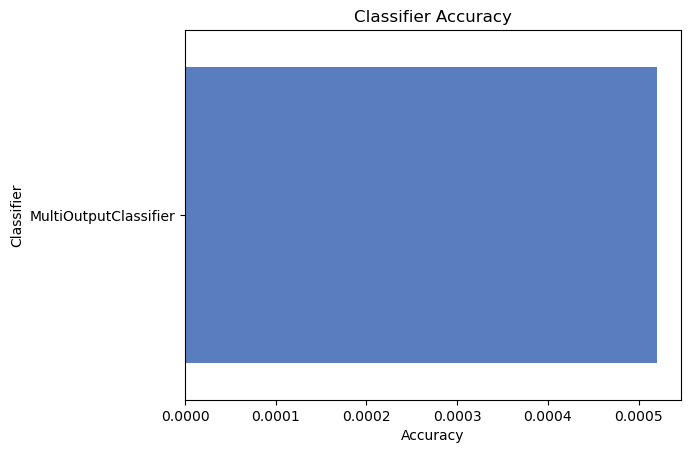

In [287]:
log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

################################## let's try with one classifier first ##################################

# Multi-Output Classifier
clf = MultiOutputClassifier(RandomForestClassifier(random_state=42))

acc_dict = {}

clf.fit(X_train, y_train)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
acc_dict[clf.__class__.__name__] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = pd.concat([log, log_entry], ignore_index=True) 

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

Laughable result...

## 1,000,000 MarkSix Simulations
Equivalent to 6944 years, 83,333 months or 2,534,722 days of data.

We are going to test out different sample size and see if it would impact the accuracy of the ML models.

The different sample size would be 20,000, 200,000 and 2,000,000

### Generate 200,000 synthetic MarkSix data with synthesizer

In [472]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(
    data=df_cols,
    table_name='winning_nums')

metadata

{
    "tables": {
        "winning_nums": {
            "columns": {
                "1st": {
                    "sdtype": "numerical"
                },
                "2nd": {
                    "sdtype": "numerical"
                },
                "3rd": {
                    "sdtype": "numerical"
                },
                "4th": {
                    "sdtype": "numerical"
                },
                "5th": {
                    "sdtype": "numerical"
                },
                "6th": {
                    "sdtype": "numerical"
                }
            }
        }
    },
    "relationships": [],
    "METADATA_SPEC_VERSION": "V1"
}

In [473]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(data=df_cols)

synthetic_data = synthesizer.sample(num_rows=200000)
synthetic_data

d:\anaconda3\envs\python3.11\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


1st  2nd  3rd  4th  5th  6th
0        11   25   31   34   43   45
1         9   14   24   19   37   47
2         9   21   24   34   42   49
3         8    8   27   32   38   49
4        19   32   35   42   45   49
...     ...  ...  ...  ...  ...  ...
199995    6   11   33   45   47   49
199996    9   28   25   25   33   43
199997    3    9    9   15   29   48
199998    2    5   16   29   39   49
199999   20   18   17   30   30   48

[200000 rows x 6 columns]

In [474]:
#there are some minor problems for the synthetic data, where number 1 and 2 disappear entirely from 1st and 2nd column respectively, therefore, we will need to fix that
#for 1st col df_cols and synthetic_data percentages distribution
df_cols_1st_percentage=(df_cols.iloc[:,0].value_counts()/1920).to_frame()
synthetic_data_1st_percentage=(synthetic_data.iloc[:,0].value_counts()/1920).to_frame()

#for 2nd col df_cols and synthetic_data percentages distribution
df_cols_2nd_percentage=(df_cols.iloc[:,1].value_counts()/1920).to_frame()
synthetic_data_2nd_percentage=(synthetic_data.iloc[:,1].value_counts()/1920).to_frame()

In [475]:
#for 1st col
# outer join both dfs
df_diff_1st=df_cols_1st_percentage.merge(synthetic_data_1st_percentage, how='outer', left_index=True, right_index=True, suffixes=('_real', '_synthetic'))
df_diff_1st['count_diff']=df_diff_1st['count_real']-df_diff_1st['count_synthetic']
df_diff_1st['numbers']=df_diff_1st['count_diff'] * 1920
#filter out the synthetic data that has a higher proportions compare to the real data (df_cols), we are going to remove some of these excess data and replace them with number 1
df_diff_1st_high=df_diff_1st[df_diff_1st['numbers'] < 0]
df_diff_1st_high['numbers']=df_diff_1st_high['numbers'] * -1
df_diff_1st_high=df_diff_1st_high.reset_index()
df_diff_1st_high

1st  count_real  count_synthetic  count_diff  numbers
0     2    0.111458        13.219792  -13.108333  25168.0
1     3    0.096875        14.177083  -14.080208  27034.0
2     4    0.085938        10.400521  -10.314583  19804.0
3     5    0.060937         8.651563   -8.590625  16494.0
4     6    0.059896         7.391146   -7.331250  14076.0
5     7    0.063021         6.307812   -6.244792  11990.0
6     8    0.054688         5.590625   -5.535938  10629.0
7     9    0.051042         4.947917   -4.896875   9402.0
8    10    0.045833         4.395313   -4.349479   8351.0
9    11    0.039062         3.905208   -3.866146   7423.0
10   12    0.034896         3.459896   -3.425000   6576.0
11   13    0.026042         3.135417   -3.109375   5970.0
12   14    0.027083         2.717188   -2.690104   5165.0
13   15    0.018750         2.372396   -2.353646   4519.0
14   16    0.015104         2.117188   -2.102083   4036.0
15   17    0.011979         1.931250   -1.919271   3685.0
16   18    0.013542         1.632292   -1.618750   3108.0
17   19    0.005729         1.466667   -1.460938   2805.0
18   20    0.008333         1.189062   -1.180729   2267.0
19   21    0.010417         1.017187   -1.006771   1933.0
20   22    0.008854         0.897917   -0.889062   1707.0
21   23    0.004167         0.757812   -0.753646   1447.0
22   24    0.003125         0.616146   -0.613021   1177.0
23   25    0.002083         0.512500   -0.510417    980.0
24   26    0.003646         0.403125   -0.399479    767.0
25   27    0.001563         0.302083   -0.300521    577.0
26   28    0.001042         0.236458   -0.235417    452.0
27   29    0.001042         0.177083   -0.176042    338.0
28   30    0.001042         0.119792   -0.118750    228.0
29   31    0.000521         0.067187   -0.066667    128.0
30   32    0.000521         0.040104   -0.039583     76.0
31   33    0.001042         0.010937   -0.009896     19.0

In [476]:
#for 2nd col
# outer join both dfs
df_diff_2nd=df_cols_2nd_percentage.merge(synthetic_data_2nd_percentage, how='outer', left_index=True, right_index=True, suffixes=('_real', '_synthetic'))
df_diff_2nd['count_diff']=df_diff_2nd['count_real']-df_diff_2nd['count_synthetic']
df_diff_2nd['numbers']=df_diff_2nd['count_diff'] * 1920
#filter out the synthetic data that has a higher proportions compare to the real data (df_cols), we are going to remove some of these excess data and replace them with number 1
df_diff_2nd_high=df_diff_2nd[df_diff_2nd['numbers'] < 0]
df_diff_2nd_high['numbers']=df_diff_2nd_high['numbers'] * -1
df_diff_2nd_high=df_diff_2nd_high.reset_index()
df_diff_2nd_high

2nd  count_real  count_synthetic  count_diff  numbers
0     3    0.025000         1.885417   -1.860417   3572.0
1     4    0.035417         3.935417   -3.900000   7488.0
2     5    0.038542         4.819271   -4.780729   9179.0
3     6    0.048958         5.267708   -5.218750  10020.0
4     7    0.036979         5.422917   -5.385937  10341.0
5     8    0.051042         5.653646   -5.602604  10757.0
6     9    0.048438         5.611458   -5.563021  10681.0
7    10    0.052083         5.650000   -5.597917  10748.0
8    11    0.050521         5.546354   -5.495833  10552.0
9    12    0.053125         5.387500   -5.334375  10242.0
10   13    0.051562         5.117708   -5.066146   9727.0
11   14    0.057813         4.916667   -4.858854   9329.0
12   15    0.044792         4.739583   -4.694792   9014.0
13   16    0.047917         4.443229   -4.395313   8439.0
14   17    0.042188         4.102604   -4.060417   7796.0
15   18    0.047917         3.847917   -3.800000   7296.0
16   19    0.027083         3.547917   -3.520833   6760.0
17   20    0.039583         3.308333   -3.268750   6276.0
18   21    0.029167         3.016146   -2.986979   5735.0
19   22    0.019271         2.759896   -2.740625   5262.0
20   23    0.022396         2.439583   -2.417187   4641.0
21   24    0.025000         2.121875   -2.096875   4026.0
22   25    0.021875         1.959375   -1.937500   3720.0
23   26    0.015104         1.704167   -1.689062   3243.0
24   27    0.010417         1.478646   -1.468229   2819.0
25   28    0.009375         1.229688   -1.220313   2343.0
26   29    0.007292         1.013021   -1.005729   1931.0
27   30    0.005729         0.873958   -0.868229   1667.0
28   31    0.002604         0.667188   -0.664583   1276.0
29   32    0.005208         0.517188   -0.511979    983.0
30   33    0.002083         0.405208   -0.403125    774.0
31   34    0.003125         0.308854   -0.305729    587.0
32   35    0.001042         0.206250   -0.205208    394.0
33   36    0.002604         0.143750   -0.141146    271.0
34   37    0.001563         0.072396   -0.070833    136.0
35   38    0.000521         0.030208   -0.029687     57.0
36   39    0.000521         0.015625   -0.015104     29.0

In [487]:
#Objectives:
#we need 251 of number 1 in '1st'
#we need 31 of number 2 in '2nd'

def replace_num(df_diff, syn_df, syn_df_col, replace_num, total_num_to_replace):
    result_df = syn_df.copy()
    freq_left = total_num_to_replace
    
    for i in range(0, len(df_diff)):
        if freq_left <= 0:  # if there are no more numbers to be replaced, break the loop
            break
            
        freq = int(df_diff['numbers'].iloc[i])   # extract the amount of numbers that need to be replaced
        to_be_replaced_num = df_diff[syn_df_col][i]    # extract the number that needs to be replaced
        
        # Find rows to replace
        to_be_replaced_mask = result_df[syn_df_col] == to_be_replaced_num
        replaceable_rows = result_df[to_be_replaced_mask]
        
        # If we have enough rows to replace
        if len(replaceable_rows) >= freq:
            # Randomly select rows to replace
            replace_indices = replaceable_rows.sample(n=min(freq, freq_left)).index
            # Replace values
            result_df.loc[replace_indices, syn_df_col] = replace_num
            freq_left -= len(replace_indices)
    
    return result_df

df_1st_diffhigh=df_diff_1st_high.copy()
df_2nd_diffhigh=df_diff_2nd_high.copy()
df_syn=synthetic_data.copy()

result_syn_df = replace_num(df_1st_diffhigh, df_syn, '1st', 1, 251)
result_syn_df = replace_num(df_2nd_diffhigh, result_syn_df, '2nd', 2, 31)

In [488]:
result_syn_df

1st  2nd  3rd  4th  5th  6th
0        11   25   31   34   43   45
1         9   14   24   19   37   47
2         9   21   24   34   42   49
3         8    8   27   32   38   49
4        19   32   35   42   45   49
...     ...  ...  ...  ...  ...  ...
199995    6   11   33   45   47   49
199996    9   28   25   25   33   43
199997    3    9    9   15   29   48
199998    2    5   16   29   39   49
199999   20   18   17   30   30   48

[200000 rows x 6 columns]

In [489]:
from sdv.evaluation.single_table import evaluate_quality
from sdv.evaluation.single_table import run_diagnostic
from sdv.evaluation.single_table import get_column_plot

diagnostic_report = run_diagnostic(
    real_data=df_cols,
    synthetic_data=result_syn_df,
    metadata=metadata)

quality_report = evaluate_quality(
    df_cols,
    result_syn_df,
    metadata)


Generating report ...

(1/2) Evaluating Data Validity: |██████████| 6/6 [00:00<00:00, 130.43it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 66.67it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 11.63it/s]|
Column Shapes Score: 93.34%

(2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:01<00:00, 14.88it/s]|
Column Pair Trends Score: 95.11%

Overall Score (Average): 94.22%



### Data Transformation

#### Feature Engineering

##### 7 numbers in a group

In [490]:
# 7 numbers in a group
df = result_syn_df.copy()

df['1-7'] = (df.iloc[:,0:6] <= 7).sum(axis=1)
df['8-14'] = ((df.iloc[:,0:6] > 7) & (df.iloc[:,0:6] <= 14)).sum(axis=1)
df['15-21'] = ((df.iloc[:,0:6] > 14) & (df.iloc[:,0:6] <= 21)).sum(axis=1)
df['22-28'] = ((df.iloc[:,0:6] > 21) & (df.iloc[:,0:6] <= 28)).sum(axis=1)
df['29-35'] = ((df.iloc[:,0:6] > 28) & (df.iloc[:,0:6] <= 35)).sum(axis=1)
df['36-42'] = ((df.iloc[:,0:6] > 35) & (df.iloc[:,0:6] <= 42)).sum(axis=1)
df['43-49'] = ((df.iloc[:,0:6] > 42) & (df.iloc[:,0:6] <= 49)).sum(axis=1)

result_syn_df = df
result_syn_df

1st  2nd  3rd  4th  5th  6th  1-7  8-14  15-21  22-28  29-35  36-42  \
0        11   25   31   34   43   45    0     1      0      1      2      0   
1         9   14   24   19   37   47    0     2      1      1      0      1   
2         9   21   24   34   42   49    0     1      1      1      1      1   
3         8    8   27   32   38   49    0     2      0      1      1      1   
4        19   32   35   42   45   49    0     0      1      0      2      1   
...     ...  ...  ...  ...  ...  ...  ...   ...    ...    ...    ...    ...   
199995    6   11   33   45   47   49    1     1      0      0      1      0   
199996    9   28   25   25   33   43    0     1      0      3      1      0   
199997    3    9    9   15   29   48    1     2      1      0      1      0   
199998    2    5   16   29   39   49    2     0      1      0      1      1   
199999   20   18   17   30   30   48    0     0      3      0      2      0   

        43-49  
0           2  
1           1  
2           1  
3           1  
4           2  
...       ...  
199995      3  
199996      1  
199997      1  
199998      1  
199999      1  

[200000 rows x 13 columns]

##### Group by columns

In [491]:
#10 numbers in a group except for group 41-49
df = result_syn_df.copy()

df['1-10'] = (df.iloc[:,0:6] <= 10).sum(axis=1)
df['11-20'] = ((df.iloc[:,0:6] > 10) & (df.iloc[:,0:6] <= 20)).sum(axis=1)
df['21-30'] = ((df.iloc[:,0:6] > 20) & (df.iloc[:,0:6] <= 30)).sum(axis=1)
df['31-40'] = ((df.iloc[:,0:6] > 30) & (df.iloc[:,0:6] <= 40)).sum(axis=1)
df['41-49'] = ((df.iloc[:,0:6] > 40) & (df.iloc[:,0:6] <= 49)).sum(axis=1)

result_syn_df = df
result_syn_df

1st  2nd  3rd  4th  5th  6th  1-7  8-14  15-21  22-28  29-35  36-42  \
0        11   25   31   34   43   45    0     1      0      1      2      0   
1         9   14   24   19   37   47    0     2      1      1      0      1   
2         9   21   24   34   42   49    0     1      1      1      1      1   
3         8    8   27   32   38   49    0     2      0      1      1      1   
4        19   32   35   42   45   49    0     0      1      0      2      1   
...     ...  ...  ...  ...  ...  ...  ...   ...    ...    ...    ...    ...   
199995    6   11   33   45   47   49    1     1      0      0      1      0   
199996    9   28   25   25   33   43    0     1      0      3      1      0   
199997    3    9    9   15   29   48    1     2      1      0      1      0   
199998    2    5   16   29   39   49    2     0      1      0      1      1   
199999   20   18   17   30   30   48    0     0      3      0      2      0   

        43-49  1-10  11-20  21-30  31-40  41-49  
0           2     0      1      1      2      2  
1           1     1      2      1      1      1  
2           1     1      0      2      1      2  
3           1     2      0      1      2      1  
4           2     0      1      0      2      3  
...       ...   ...    ...    ...    ...    ...  
199995      3     1      1      0      1      3  
199996      1     1      0      3      1      1  
199997      1     3      1      1      0      1  
199998      1     2      1      1      1      1  
199999      1     0      3      2      0      1  

[200000 rows x 18 columns]

##### Group by colors

In [492]:
# group by colours
# Define RGB sets
R = {1, 2, 12, 13, 23, 24, 34, 35, 45, 46, 7, 8, 18, 19, 29, 30, 40}
G = {11, 21, 22, 32, 33, 43, 44, 5, 6, 16, 17, 27, 28, 38, 39, 49}
B = {41, 31, 42, 3, 4, 14, 15, 25, 26, 36, 37, 47, 48, 9, 10, 20}

df = result_syn_df.copy()

# Initialize new columns
df['R'] = 0
df['G'] = 0
df['B'] = 0

# Count frequency of RGB values for the first 6 columns only
for index, row in df.iterrows():
    winning_numbers = row[['1st', '2nd', '3rd', '4th', '5th', '6th']]
    for value in winning_numbers:
        if value in R:
            df.at[index, 'R'] += 1
        elif value in G:
            df.at[index, 'G'] += 1
        elif value in B:
            df.at[index, 'B'] += 1

result_syn_df = df
result_syn_df

1st  2nd  3rd  4th  5th  6th  1-7  8-14  15-21  22-28  ...  36-42  \
0        11   25   31   34   43   45    0     1      0      1  ...      0   
1         9   14   24   19   37   47    0     2      1      1  ...      1   
2         9   21   24   34   42   49    0     1      1      1  ...      1   
3         8    8   27   32   38   49    0     2      0      1  ...      1   
4        19   32   35   42   45   49    0     0      1      0  ...      1   
...     ...  ...  ...  ...  ...  ...  ...   ...    ...    ...  ...    ...   
199995    6   11   33   45   47   49    1     1      0      0  ...      0   
199996    9   28   25   25   33   43    0     1      0      3  ...      0   
199997    3    9    9   15   29   48    1     2      1      0  ...      0   
199998    2    5   16   29   39   49    2     0      1      0  ...      1   
199999   20   18   17   30   30   48    0     0      3      0  ...      0   

        43-49  1-10  11-20  21-30  31-40  41-49  R  G  B  
0           2     0      1      1      2      2  2  2  2  
1           1     1      2      1      1      1  2  0  4  
2           1     1      0      2      1      2  2  2  2  
3           1     2      0      1      2      1  2  4  0  
4           2     0      1      0      2      3  3  2  1  
...       ...   ...    ...    ...    ...    ... .. .. ..  
199995      3     1      1      0      1      3  1  4  1  
199996      1     1      0      3      1      1  0  3  3  
199997      1     3      1      1      0      1  1  0  5  
199998      1     2      1      1      1      1  2  4  0  
199999      1     0      3      2      0      1  3  1  2  

[200000 rows x 21 columns]

##### Group by rows

In [493]:
df=result_syn_df.copy()
df['1_row'] = (df.iloc[:, 2:8] % 10 == 0).sum(axis=1)

# Create a list of row suffixes and a corresponding list of target values
suffixes = range(2, 11)  # for 2_row to 10_row
targets = [9, 8, 7, 6, 5, 4, 3, 2, 1]  # corresponding values for each row

for suffix, target in zip(suffixes, targets):
    condition = df.iloc[:, 2:8].isin([target + 10*i for i in range(0, 5)])
    df[f'{suffix}_row'] = condition.sum(axis=1)

result_syn_df = df
result_syn_df

1st  2nd  3rd  4th  5th  6th  1-7  8-14  15-21  22-28  ...  1_row  \
0        11   25   31   34   43   45    0     1      0      1  ...      1   
1         9   14   24   19   37   47    0     2      1      1  ...      1   
2         9   21   24   34   42   49    0     1      1      1  ...      1   
3         8    8   27   32   38   49    0     2      0      1  ...      1   
4        19   32   35   42   45   49    0     0      1      0  ...      2   
...     ...  ...  ...  ...  ...  ...  ...   ...    ...    ...  ...    ...   
199995    6   11   33   45   47   49    1     1      0      0  ...      0   
199996    9   28   25   25   33   43    0     1      0      3  ...      1   
199997    3    9    9   15   29   48    1     2      1      0  ...      0   
199998    2    5   16   29   39   49    2     0      1      0  ...      1   
199999   20   18   17   30   30   48    0     0      3      0  ...      4   

        2_row  3_row  4_row  5_row  6_row  7_row  8_row  9_row  10_row  
0           0      0      0      0      1      1      1      0       2  
1           1      0      2      0      0      1      0      1       0  
2           1      0      0      0      0      2      0      1       1  
3           1      1      1      0      0      0      0      2       0  
4           1      0      0      0      2      0      0      1       0  
...       ...    ...    ...    ...    ...    ...    ...    ...     ...  
199995      1      0      1      0      1      0      1      0       2  
199996      0      0      0      0      2      0      2      0       1  
199997      2      1      0      0      1      0      0      1       1  
199998      3      0      0      1      0      0      0      1       0  
199999      0      1      1      0      0      0      0      0       0  

[200000 rows x 31 columns]

##### Low, high, odd, even

In [494]:
df=result_syn_df.copy()

#Low
df['Low'] = (df.iloc[:,0:6] <= 24).sum(axis=1)
#high
df['High'] = (df.iloc[:,0:6] > 24).sum(axis=1)
#odd
df['odd'] = (df.iloc[:,0:6] % 2 > 0).sum(axis=1)
#even
df['even'] = (df.iloc[:,0:6] % 2 == 0).sum(axis=1)

result_syn_df = df
result_syn_df

1st  2nd  3rd  4th  5th  6th  1-7  8-14  15-21  22-28  ...  5_row  \
0        11   25   31   34   43   45    0     1      0      1  ...      0   
1         9   14   24   19   37   47    0     2      1      1  ...      0   
2         9   21   24   34   42   49    0     1      1      1  ...      0   
3         8    8   27   32   38   49    0     2      0      1  ...      0   
4        19   32   35   42   45   49    0     0      1      0  ...      0   
...     ...  ...  ...  ...  ...  ...  ...   ...    ...    ...  ...    ...   
199995    6   11   33   45   47   49    1     1      0      0  ...      0   
199996    9   28   25   25   33   43    0     1      0      3  ...      0   
199997    3    9    9   15   29   48    1     2      1      0  ...      0   
199998    2    5   16   29   39   49    2     0      1      0  ...      1   
199999   20   18   17   30   30   48    0     0      3      0  ...      0   

        6_row  7_row  8_row  9_row  10_row  Low  High  odd  even  
0           1      1      1      0       2    1     5    5     1  
1           0      1      0      1       0    4     2    4     2  
2           0      2      0      1       1    3     3    3     3  
3           0      0      0      2       0    2     4    2     4  
4           2      0      0      1       0    1     5    4     2  
...       ...    ...    ...    ...     ...  ...   ...  ...   ...  
199995      1      0      1      0       2    2     4    5     1  
199996      2      0      2      0       1    1     5    5     1  
199997      1      0      0      1       1    4     2    5     1  
199998      0      0      0      1       0    3     3    4     2  
199999      0      0      0      0       0    3     3    1     5  

[200000 rows x 35 columns]

#### Binarizer

In [498]:
df = result_syn_df.iloc[:,0:6]

# Create a binary DataFrame with 49 columns (0 to 48)
binary_df = pd.DataFrame(0, index=df.index, columns=range(1,50))

# Fill the binary DataFrame based on the values in df
for index, row in df.iterrows():
    for value in row:
        if value <= 49:  # Ensure the value is within the column range
            binary_df.at[index, value] = 1

# Use Binarizer to achieve the same result
binarizer = Binarizer()
binary_array = binarizer.fit_transform(binary_df)

# Convert back to DataFrame for better readability
binary_df_binarizer = pd.DataFrame(binary_array, columns=binary_df.columns)

binary_df_binarizer

1   2   3   4   5   6   7   8   9   10  ...  40  41  42  43  44  45  \
0        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   1   0   1   
1        0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   
2        0   0   0   0   0   0   0   0   1   0  ...   0   0   1   0   0   0   
3        0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   0   0   
4        0   0   0   0   0   0   0   0   0   0  ...   0   0   1   0   0   1   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
199995   0   0   0   0   0   1   0   0   0   0  ...   0   0   0   0   0   1   
199996   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   1   0   0   
199997   0   0   1   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   
199998   0   1   0   0   1   0   0   0   0   0  ...   0   0   0   0   0   0   
199999   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   

        46  47  48  49  
0        0   0   0   0  
1        0   1   0   0  
2        0   0   0   1  
3        0   0   0   1  
4        0   0   0   1  
...     ..  ..  ..  ..  
199995   0   1   0   1  
199996   0   0   0   0  
199997   0   0   1   0  
199998   0   0   0   1  
199999   0   0   1   0  

[200000 rows x 49 columns]

In [505]:
result_syn_df

1st  2nd  3rd  4th  5th  6th  1-7  8-14  15-21  22-28  ...  5_row  \
0        11   25   31   34   43   45    0     1      0      1  ...      0   
1         9   14   24   19   37   47    0     2      1      1  ...      0   
2         9   21   24   34   42   49    0     1      1      1  ...      0   
3         8    8   27   32   38   49    0     2      0      1  ...      0   
4        19   32   35   42   45   49    0     0      1      0  ...      0   
...     ...  ...  ...  ...  ...  ...  ...   ...    ...    ...  ...    ...   
199995    6   11   33   45   47   49    1     1      0      0  ...      0   
199996    9   28   25   25   33   43    0     1      0      3  ...      0   
199997    3    9    9   15   29   48    1     2      1      0  ...      0   
199998    2    5   16   29   39   49    2     0      1      0  ...      1   
199999   20   18   17   30   30   48    0     0      3      0  ...      0   

        6_row  7_row  8_row  9_row  10_row  Low  High  odd  even  
0           1      1      1      0       2    1     5    5     1  
1           0      1      0      1       0    4     2    4     2  
2           0      2      0      1       1    3     3    3     3  
3           0      0      0      2       0    2     4    2     4  
4           2      0      0      1       0    1     5    4     2  
...       ...    ...    ...    ...     ...  ...   ...  ...   ...  
199995      1      0      1      0       2    2     4    5     1  
199996      2      0      2      0       1    1     5    5     1  
199997      1      0      0      1       1    4     2    5     1  
199998      0      0      0      1       0    3     3    4     2  
199999      0      0      0      0       0    3     3    1     5  

[200000 rows x 35 columns]

In [501]:
df=binary_df_binarizer.copy()
df_ = result_syn_df.iloc[:,6:]

train=pd.concat([df,df_], axis=1)

In [510]:
train.to_csv('MarkSix_SyntheticData_200k_withFeatures.csv', header=True, index=False)

### ML Model

In [3]:
MarkSix_df=pd.read_csv('MarkSix_SyntheticData_200k_withFeatures.csv')

In [4]:
train_x=MarkSix_df.iloc[:,50:].values
train_y=MarkSix_df.iloc[:,0:49].values

In [5]:
#we are going to use the train_test_split method because the sequence of the data is important
# Use regular train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=0)

print("Training set shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nTest set shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Training set shapes:
X_train: (180000, 28)
y_train: (180000, 49)

Test set shapes:
X_test: (20000, 28)
y_test: (20000, 49)


#### Train once with MultiOutputRandomForestClassifier

/tmp/ipykernel_1952/3178882763.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  log = pd.concat([log, log_entry], ignore_index=True)


<Axes: title={'center': 'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

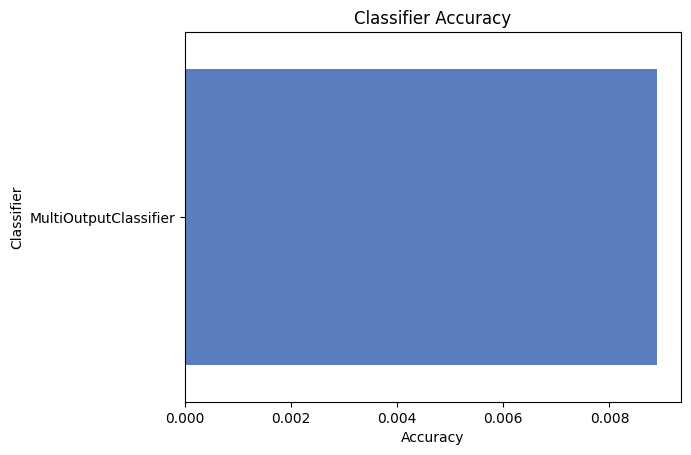

In [8]:
log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

################################## let's try with one classifier first ##################################

# Multi-Output Classifier
clf = MultiOutputClassifier(RandomForestClassifier(random_state=42))

acc_dict = {}

clf.fit(X_train, y_train)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
acc_dict[clf.__class__.__name__] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = pd.concat([log, log_entry], ignore_index=True) 

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

#### Train 200 epochs with SGDClassifier

In [24]:
y_prob[20]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.4370339 , 0.51123075,
       0.28936525, 0.06997744, 0.26888739, 0.37798268, 0.38082933,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.12479804,
       0.27647196, 0.67403493, 0.        , 0.44727605, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.88185092,
       0.        , 0.35367664, 0.07978541, 0.69853896])

In [6]:
train_x=MarkSix_df.iloc[:,50:].values
train_y=MarkSix_df.iloc[:,0:49].values
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=0)

# Initialize the SGDClassifier with modified_huber loss for probability estimates
sgd_classifier = SGDClassifier(loss='modified_huber', max_iter=1000, tol=1e-3)
multi_label_classifier = OneVsRestClassifier(sgd_classifier)

# Train the classifier
n_epochs = 200
for epoch in range(n_epochs):
    multi_label_classifier.fit(X_train, y_train)
    print(f"Epoch {epoch + 1}/{n_epochs} completed.")
    
# Make predictions and get probabilities
y_prob = multi_label_classifier.predict_proba(X_test)

# Function to select exactly 6 labels based on highest probabilities
def select_top_k_labels(y_prob, k=6):
    n_samples = y_prob.shape[0]
    y_pred = np.zeros_like(y_prob)
    
    # For each sample, get the indices of top k probabilities
    for i in range(n_samples):
        top_k_indices = np.argsort(y_prob[i])[-k:]  # Get indices of k highest probabilities
        y_pred[i, top_k_indices] = 1  # Set those indices to 1
    
    return y_pred

# Get exactly 6 predictions for each sample
y_pred = select_top_k_labels(y_prob, k=6)

def convert_predictions_to_numbers(pred_array):
    return [np.where(row == 1)[0] for row in pred_array]

y_pred = convert_predictions_to_numbers(y_pred)
y_test = convert_predictions_to_numbers(y_test)

# Convert to binary format for multi-label evaluation
mlb = MultiLabelBinarizer()
y_test_bin = mlb.fit_transform(y_test)
y_pred_bin = mlb.transform(y_pred)

# Calculate overall metrics
h_loss = hamming_loss(y_test_bin, y_pred_bin)
accuracy = accuracy_score(y_test_bin, y_pred_bin)
subset_accuracy = accuracy  # Matches the definition here

# Calculate precision, recall, and F1 Score using sklearn metrics
precision = precision_score(y_test_bin, y_pred_bin, average='samples')
recall = recall_score(y_test_bin, y_pred_bin, average='samples')
f1_score_value = f1_score(y_test_bin, y_pred_bin, average='samples')

jaccard = jaccard_score(y_test_bin, y_pred_bin, average='samples')
coverage = coverage_error(y_test_bin, y_pred_bin)

# Print overall metrics
print(f"Hamming Loss: {h_loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Overall): {precision:.4f}")
print(f"Recall (Overall): {recall:.4f}")
print(f"F1 Score (Overall): {f1_score_value:.4f}")
print(f"Subset Accuracy: {subset_accuracy:.4f}")
print(f"Jaccard Index: {jaccard:.4f}")
print(f"Coverage Error: {coverage:.4f}")

# Calculate and print individual scores for each sample
print("\nIndividual Scores for Each Sample:")
for i in range(len(y_test)):
    sample_precision = precision_score(y_test_bin[i:i+1], y_pred_bin[i:i+1], average='micro')
    sample_recall = recall_score(y_test_bin[i:i+1], y_pred_bin[i:i+1], average='micro')
    sample_f1 = f1_score(y_test_bin[i:i+1], y_pred_bin[i:i+1], average='micro')
    
    print(f"Sample {i + 1}: Precision = {sample_precision:.4f}, Recall = {sample_recall:.4f}, F1 Score = {sample_f1:.4f}")

# Print predictions and actual values
print("\nSample-wise Predictions and Actual Values:")
for i in range(0,100):
    print(f"Sample {i + 1}:")
    print(f"  Predicted: {y_pred[i]}")
    print(f"  Actual: {y_test[i]}\n")

Epoch 1/200 completed.
Epoch 2/200 completed.
Epoch 3/200 completed.
Epoch 4/200 completed.
Epoch 5/200 completed.
Epoch 6/200 completed.
Epoch 7/200 completed.
Epoch 8/200 completed.
Epoch 9/200 completed.
Epoch 10/200 completed.
Epoch 11/200 completed.
Epoch 12/200 completed.
Epoch 13/200 completed.
Epoch 14/200 completed.
Epoch 15/200 completed.
Epoch 16/200 completed.
Epoch 17/200 completed.
Epoch 18/200 completed.
Epoch 19/200 completed.
Epoch 20/200 completed.
Epoch 21/200 completed.
Epoch 22/200 completed.
Epoch 23/200 completed.
Epoch 24/200 completed.
Epoch 25/200 completed.
Epoch 26/200 completed.
Epoch 27/200 completed.
Epoch 28/200 completed.
Epoch 29/200 completed.
Epoch 30/200 completed.
Epoch 31/200 completed.
Epoch 32/200 completed.
Epoch 33/200 completed.
Epoch 34/200 completed.
Epoch 35/200 completed.
Epoch 36/200 completed.
Epoch 37/200 completed.
Epoch 38/200 completed.
Epoch 39/200 completed.
Epoch 40/200 completed.
Epoch 41/200 completed.
Epoch 42/200 completed.
E

#### Use ML model to predict real life MarkSix

In [9]:
# Save the trained model
joblib.dump(multi_label_classifier, 'MarkSix_200k_model.pkl')
print("Model saved as 'multi_label_classifier_model.pkl'.")

Model saved as 'multi_label_classifier_model.pkl'.


In [14]:
#prepare real life data
df = df_cols

# Create a binary DataFrame with 49 columns (0 to 48)
binary_df = pd.DataFrame(0, index=df.index, columns=range(1,50))

# Fill the binary DataFrame based on the values in df
for index, row in df.iterrows():
    for value in row:
        if value <= 49:  # Ensure the value is within the column range
            binary_df.at[index, value] = 1

# Use Binarizer to achieve the same result
binarizer = Binarizer()
binary_array = binarizer.fit_transform(binary_df)

# Convert back to DataFrame for better readability
binary_df_binarizer = pd.DataFrame(binary_array, columns=binary_df.columns)

binary_df_binarizer

1   2   3   4   5   6   7   8   9   10  ...  40  41  42  43  44  45  46  \
0      0   0   0   0   0   0   0   0   0   0  ...   1   0   1   0   0   0   0   
1      0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   1   0   
2      0   0   1   0   0   1   0   0   0   0  ...   0   0   0   0   0   0   0   
3      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
4      0   0   1   1   0   1   0   0   0   0  ...   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
1915   1   1   0   0   0   0   0   0   0   0  ...   0   0   1   0   0   0   0   
1916   0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
1917   0   0   0   1   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
1918   0   0   0   1   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
1919   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

      47  48  49  
0      0   0   0  
1      0   0   0  
2      0   0   0  
3      0   1   1  
4      0   0   0  
...   ..  ..  ..  
1915   0   1   0  
1916   0   0   0  
1917   0   0   0  
1918   0   0   0  
1919   0   0   0  

[1920 rows x 49 columns]

In [ ]:
# Load the model
loaded_model = joblib.load('MarkSix_200k_model.pkl')
print("Model loaded successfully.")

# Replace `new_data` with your actual test data
new_data = binary_df_binarizer

# Make predictions on the new data
y_prob_new = loaded_model.predict_proba(new_data)

# Make predictions and get probabilities
y_prob = multi_label_classifier.predict_proba(X_test)

# Function to select exactly 6 labels based on highest probabilities
def select_top_k_labels(y_prob, k=6):
    n_samples = y_prob.shape[0]
    y_pred = np.zeros_like(y_prob)
    
    # For each sample, get the indices of top k probabilities
    for i in range(n_samples):
        top_k_indices = np.argsort(y_prob[i])[-k:]  # Get indices of k highest probabilities
        y_pred[i, top_k_indices] = 1  # Set those indices to 1
    
    return y_pred

# Get exactly 6 predictions for each sample
y_pred = select_top_k_labels(y_prob, k=6)

def convert_predictions_to_numbers(pred_array):
    return [np.where(row == 1)[0] for row in pred_array]

y_pred = convert_predictions_to_numbers(y_pred)
y_test = convert_predictions_to_numbers(y_test)

# Convert to binary format for multi-label evaluation
mlb = MultiLabelBinarizer()
y_test_bin = mlb.fit_transform(y_test)
y_pred_bin = mlb.transform(y_pred)

# Calculate overall metrics
h_loss = hamming_loss(y_test_bin, y_pred_bin)
accuracy = accuracy_score(y_test_bin, y_pred_bin)
subset_accuracy = accuracy  # Matches the definition here

# Calculate precision, recall, and F1 Score using sklearn metrics
precision = precision_score(y_test_bin, y_pred_bin, average='samples')
recall = recall_score(y_test_bin, y_pred_bin, average='samples')
f1_score_value = f1_score(y_test_bin, y_pred_bin, average='samples')

jaccard = jaccard_score(y_test_bin, y_pred_bin, average='samples')
coverage = coverage_error(y_test_bin, y_pred_bin)

# Print overall metrics
print(f"Hamming Loss: {h_loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Overall): {precision:.4f}")
print(f"Recall (Overall): {recall:.4f}")
print(f"F1 Score (Overall): {f1_score_value:.4f}")
print(f"Subset Accuracy: {subset_accuracy:.4f}")
print(f"Jaccard Index: {jaccard:.4f}")
print(f"Coverage Error: {coverage:.4f}")

# Calculate and print individual scores for each sample
print("\nIndividual Scores for Each Sample:")
for i in range(len(y_test)):
    sample_precision = precision_score(y_test_bin[i:i+1], y_pred_bin[i:i+1], average='micro')
    sample_recall = recall_score(y_test_bin[i:i+1], y_pred_bin[i:i+1], average='micro')
    sample_f1 = f1_score(y_test_bin[i:i+1], y_pred_bin[i:i+1], average='micro')
    
    print(f"Sample {i + 1}: Precision = {sample_precision:.4f}, Recall = {sample_recall:.4f}, F1 Score = {sample_f1:.4f}")

# Print predictions and actual values
print("\nSample-wise Predictions and Actual Values:")
for i in range(0,100):
    print(f"Sample {i + 1}:")
    print(f"  Predicted: {y_pred[i]}")
    print(f"  Actual: {y_test[i]}\n")

Model loaded successfully.


In [ ]:
#temp

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Step 1: Load historical data
data = pd.read_csv('marksix_data.csv')  # Replace with your actual data file

# Step 2: Preprocess data
# Assume data has columns: 'number1', 'number2', ..., 'number6'
# Create features based on historical patterns
# Example: Frequency of each number (this is a simplistic example)
number_columns = ['number1', 'number2', 'number3', 'number4', 'number5', 'number6']
number_frequency = data[number_columns].stack().value_counts()

# Create a new DataFrame to hold frequency features
frequency_df = pd.DataFrame(number_frequency).reset_index()
frequency_df.columns = ['number', 'frequency']

# Step 3: Prepare features and target (you might not have a target for the next draw)
X = frequency_df[['number', 'frequency']]

# You can create a target variable based on the last draw or use the last few draws
# For this example, let's assume we are predicting the next set based on past frequency
# In reality, you can choose to use historical draws to inform your choices

# Step 4: Train the model
model = RandomForestClassifier()
model.fit(X, np.random.choice(range(1, 50), size=X.shape[0]))  # Dummy target for illustration

# Step 5: Generate predictions (not using a traditional test set)
# Here, you can simply predict the most likely numbers based on frequency
predicted_numbers = frequency_df.nlargest(6, 'frequency')['number'].values

# Print the suggested numbers
print("Suggested Mark Six Numbers: ", predicted_numbers)

# Define the output of the ML model
- predict all 7 numbers (most difficult)
- predict 7 numbers for the next 3,5,7,10 draws (more room for the prediction)
- select 1 number only for the next draw (1/47, ~2% chance to guess correctly?)
- guess only 3 numbers out of the 6 (7th price)
- guess only 4 numbers out of the 6 (5th price)

#### 頭獎	選中6個「攪出號碼」	獎金會因應該期獲中頭獎注數而有所不同，每期頭獎基金訂為不少於港幣500萬元。
#### 二獎	選中5個「攪出號碼」+「特別號碼」	獎金會因應該期獲中二獎注數而有所不同
#### 三獎	選中5個「攪出號碼」	獎金會因應該期獲中三獎注數而有所不同
#### 四獎	選中4個「攪出號碼」+「特別號碼」	固定獎金港幣$4,800

#### 五獎	選中4個「攪出號碼」	固定獎金港幣$320

#### 六獎	選中3個「攪出號碼」+「特別號碼」	固定獎金港幣$160

#### 七獎	選中3個「攪出號碼」	固定獎金港幣$20